<a href="https://colab.research.google.com/github/Isabel-R-Orlando/INFO2950-Discussion-1/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 6: Elections




## Introduction to precincts

Let's look at a precinct shapefile from 2022.  (This one is sourced to political operative Ben Rosenblatt, [link](https://www.benjrosenblatt.com/new-york-2022-election-district-level-data).)  

In [1]:
!curl -OL https://github.com/PUBPOL-2130/notebooks/raw/refs/heads/main/data/week6_NY_precincts.zip
!unzip week6_NY_precincts.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 21.9M  100 21.9M    0     0  7207k      0  0:00:03  0:00:03 --:--:-- 18.0M
Archive:  week6_NY_precincts.zip
   creating: week6_NY_precincts/
  inflating: __MACOSX/._week6_NY_precincts  
  inflating: week6_NY_precincts/week6-NY-precincts.dbf  
  inflating: __MACOSX/week6_NY_precincts/._week6-NY-precincts.dbf  
  inflating: week6_NY_precincts/week6-NY-precincts.cpg  
  inflating: __MACOSX/week6_NY_precincts/._week6-NY-precincts.cpg  
  inflating: week6_NY_precincts/week6-NY-precincts.shp  
  inflating: __MACOSX/week6_NY_precincts/._week6-NY-precincts.shp  
  inflating: week6_NY_precincts/week6-NY-precincts.shx  
  inflating: __MACOSX/week6_NY_precincts/._week6-NY-precincts.shx  
  inflating: week6_NY_precincts/week6-NY-precincts.prj  
  inflating: __M

Since we're going to look at some election results in New York, let's bring back the block and tract shapefiles from a few weeks back.

In [2]:
!curl -OL "https://github.com/PUBPOL-2130/notebooks/raw/refs/heads/main/data/week4_36_county_block_gdf.zip"
!curl -OL "https://github.com/PUBPOL-2130/notebooks/raw/refs/heads/main/data/week4_36_county_block_with_race_gdf.zip"
!curl -OL "https://github.com/PUBPOL-2130/notebooks/raw/refs/heads/main/data/week4_36_county_block_with_race_populated_gdf.zip"
!curl -OL "https://github.com/PUBPOL-2130/notebooks/raw/refs/heads/main/data/week4_36_county_tract_gdf.zip"
!curl -OL "https://github.com/PUBPOL-2130/notebooks/raw/refs/heads/main/data/week4_36_county_tract_with_acs_gdf.zip"


!unzip week4_36_county_block_gdf.zip
!unzip week4_36_county_block_with_race_gdf.zip
!unzip week4_36_county_block_with_race_populated_gdf.zip
!unzip week4_36_county_tract_gdf.zip
!unzip week4_36_county_tract_with_acs_gdf.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1539k  100 1539k    0     0   863k      0  0:00:01  0:00:01 --:--:-- 6250k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2176k  100 2176k    0     0  1022k      0  0:00:02  0:00:02 --:--:-- 6993k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1678k  100 1678k    0     0   795k      0  0:00:02  0:00:02 --:--:-- 2574k
  % Total    % Received % Xferd  Average Speed   Tim

We're going to use the Data and Democracy Lab's "MAUP" package to transfer data between geounits.  You can read the docs [here](https://maup.readthedocs.io/en/latest/) if you're curious!

In [3]:
!pip install maup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import maup
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_formats = ["retina"]

In [5]:
state_fips = "36"    # New York
county_fips = "047"
county_name = "Kings County"  # Also known as Brooklyn

In [6]:
county_block_gdf = gpd.read_file(f"week4_{state_fips}_county_block_gdf")
county_block_with_race_gdf = gpd.read_file(f"week4_{state_fips}_county_block_with_race_gdf")
county_block_with_race_populated_gdf = gpd.read_file(f"week4_{state_fips}_county_block_with_race_populated_gdf")
county_tract_gdf = gpd.read_file(f"week4_{state_fips}_county_tract_gdf")
county_tract_with_acs_gdf = gpd.read_file(f"week4_{state_fips}_county_tract_with_acs_gdf")

In [7]:
county_block_gdf.set_index("GEOID20", inplace=True)
county_block_gdf.index = county_block_gdf.index.astype(str)
county_block_with_race_gdf.set_index("GEOID20", inplace=True)
county_block_with_race_gdf.index = county_block_with_race_gdf.index.astype(str)
county_block_with_race_populated_gdf.set_index("GEOID20", inplace=True)
county_block_with_race_gdf.index = county_block_with_race_gdf.index.astype(str)
county_tract_gdf.set_index("GEOID", inplace=True)
county_tract_gdf.index = county_tract_gdf.index.astype(str)
county_tract_with_acs_gdf.set_index("GEOID", inplace=True)
county_tract_with_acs_gdf.index = county_tract_with_acs_gdf.index.astype(str)

In [8]:
choropleth_style = dict(
    edgecolor="0.1",
    linewidth=0.2,
    cmap="Blues",
    legend=True,
    legend_kwds={'shrink': 0.4},
)

In [9]:
ny_precinct_gdf = gpd.read_file("week6_NY_precincts")

Let's take a look at the shapefile, which already has both election results and geometry together.  Here, "ED" means "election district" -- that's basically a precinct/VTD.

In [10]:
ny_precinct_gdf

GEOID CountyFP                      EDName  USSen_DEM  \
0      360010101001      001          Albany Ward 1 ED 1         39   
1      360010101010      001         Albany Ward 1 ED 10          7   
2      360010101002      001          Albany Ward 1 ED 2        146   
3      360010101003      001          Albany Ward 1 ED 3        182   
4      360010101004      001          Albany Ward 1 ED 4        172   
...             ...      ...                         ...        ...   
13962  361090603002      109  City of Ithaca Ward 3 ED 2        555   
13963  361030200241      103              Brookhaven 241        337   
13964  361030200120      103              Brookhaven 120        382   
13965  361030200199      103              Brookhaven 199        101   
13966  361030200284      103              Brookhaven 284        346   

       USSen_WOR  USSen_REP  USSen_CON  USSen_LAR  USSen_Writ  \
0              6          9          0          0           0   
1              0          0          0          0           0   
2             30         21          6          1           0   
3             21         47          5          0           2   
4             22         28          4          2           0   
...          ...        ...        ...        ...         ...   
13962        147         47          7          0           2   
13963         14        349         47          3           0   
13964         24        399         47          3           1   
13965          3        115         20          2           0   
13966         13        376         69          1           0   

                                                geometry  
0      MULTIPOLYGON (((1038891.425 898237.779, 103888...  
1      POLYGON ((1048486.377 900489.622, 1048847.807 ...  
2      POLYGON ((1040970.913 900781.014, 1040656.324 ...  
3      POLYGON ((1040894.602 900719.937, 1040999.140 ...  
4      POLYGON ((1045046.865 900050.239, 1044979.039 ...  
...                                                  ...  
13962  POLYGON ((313246.719 839085.251, 313448.412 83...  
13963  POLYGON ((1255349.614 255179.022, 1255117.104 ...  
13964  POLYGON ((1259376.198 255219.458, 1259402.593 ...  
13965  POLYGON ((1276315.987 262879.744, 1276414.941 ...  
13966  POLYGON ((1272890.895 262945.873, 1272745.282 ...  

[13967 rows x 10 columns]

We'll pull out columns for the US Senate contest.

In [11]:
sen_columns = [col for col in ny_precinct_gdf if col.startswith("USSen_")]

In [12]:
ny_precinct_gdf["USSen_total"] = ny_precinct_gdf[sen_columns].sum(axis=1)
sen_columns.append("USSen_total")

Despite the fact that we found a mostly-clean shapefile, there is still a small geometry error that we'll clean up with some buffering.  (Ask me if you want to hear more about this kind of thing!)

In [13]:
# there was an invalid geometry error in this shapefile, and this was a quick fix
county_precinct_gdf = ny_precinct_gdf[ny_precinct_gdf.CountyFP == county_fips]
county_precinct_gdf.geometry = county_precinct_gdf.geometry.buffer(0)

OK, now we've created a county-level geodataframe (by default, this notebook chooses Kings County, otherwise known as Brooklyn).

We're looking at the votes from the [2022 U.S. Senate contest](https://ballotpedia.org/United_States_Senate_election_in_New_York,_2022).  Chuck Schumer ran on both the Dem and Working Parties line; Joe Pinion challenged him as both a Republican and Constitutional Party nominee; and Diane Sare picked up a handful of votes on the LaRouche Party line.  (Look up [Lyndon LaRouche](https://en.wikipedia.org/wiki/Lyndon_LaRouche)-- it's quite a story!)

In [14]:
county_precinct_gdf

GEOID CountyFP         EDName  USSen_DEM  USSen_WOR  USSen_REP  \
5698  360470044003      047          44003        112         42         11   
5699  360470044017      047          44017        639        268         48   
5700  360470044018      047          44018        480        189         48   
5701  360470044019      047          44019        413        171         33   
5702  360470044020      047          44020        178         27          0   
...            ...      ...            ...        ...        ...        ...   
9202  360470055015      047          55015        326         42         31   
9203  360470055019      047          55019        157         11         16   
9216  360470041037      047    41037-41039         61          1         71   
9217  360470049002      047  49001 & 49002         29          4         15   
9218  360470050029      047  50009 & 50029        473         58         72   

      USSen_CON  USSen_LAR  USSen_Writ  \
5698          1          0           1   
5699          5          3           1   
5700          7          3           3   
5701          4          2           0   
5702          3          2           0   
...         ...        ...         ...   
9202          2          1           0   
9203          1          2           0   
9216          7          0           0   
9217          5          1           0   
9218          3          3           0   

                                               geometry  USSen_total  
5698  POLYGON ((988009.323 181564.487, 987870.163 18...          167  
5699  POLYGON ((989681.843 184198.133, 989124.465 18...          964  
5700  POLYGON ((988469.312 183736.225, 989124.465 18...          730  
5701  POLYGON ((988845.453 182881.161, 988427.282 18...          623  
5702  POLYGON ((987241.316 183285.835, 987380.998 18...          210  
...                                                 ...          ...  
9202  POLYGON ((1010864.382 186749.371, 1010748.791 ...          402  
9203  POLYGON ((1011245.231 185499.827, 1011178.548 ...          187  
9216  POLYGON ((1000676.502 159803.600, 1000418.829 ...          140  
9217  POLYGON ((984701.266 171678.290, 984303.448 17...           54  
9218  MULTIPOLYGON (((994877.026 203365.082, 994754....          609  

[1333 rows x 11 columns]

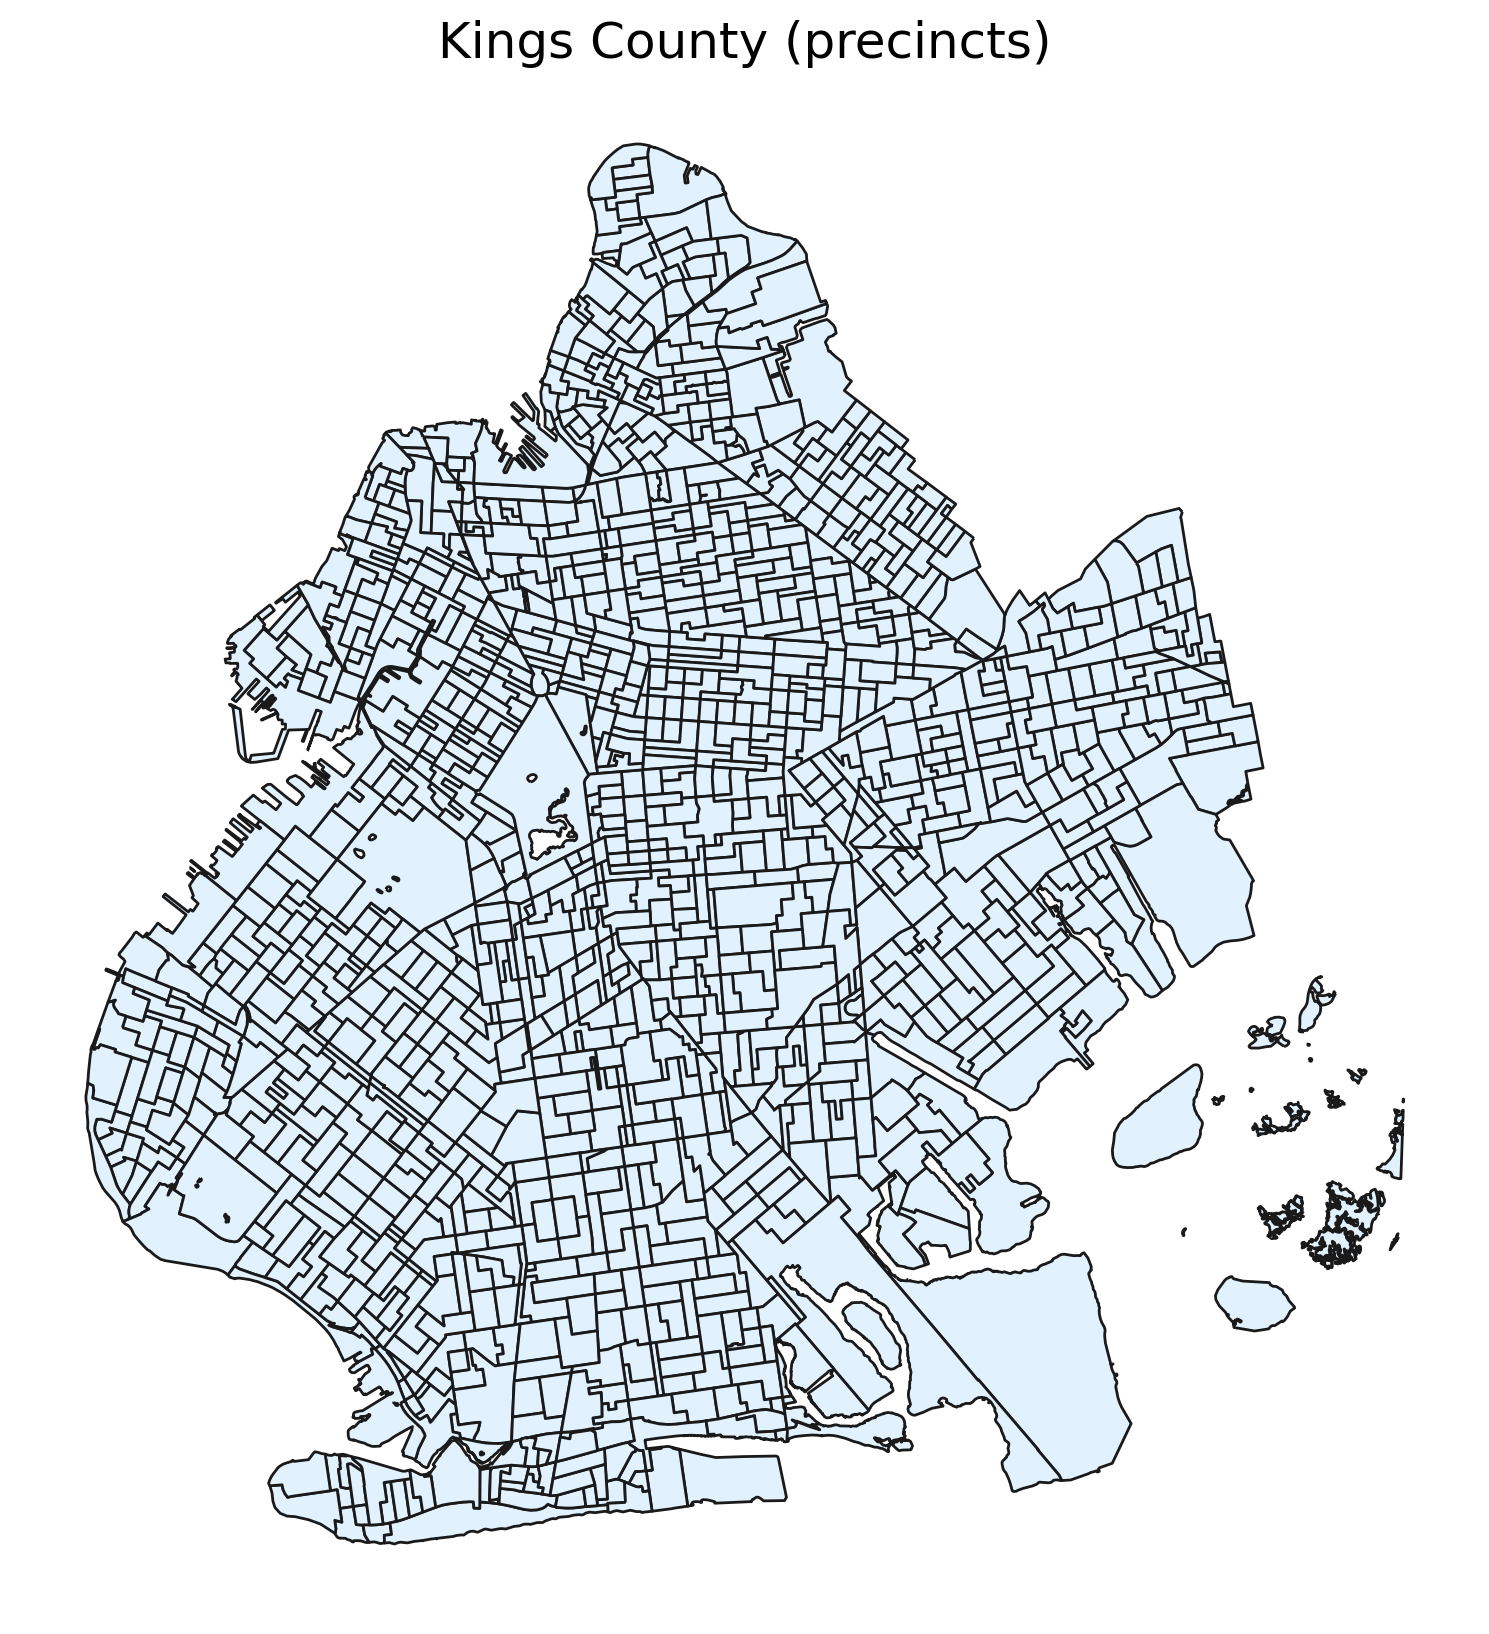

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title(f"{county_name} (precincts)", fontsize=18)
ax.axis('off')
county_precinct_gdf.plot(ax=ax, edgecolor="0.1", linewidth=1, color="#e1f1fd")
plt.axis('off')
plt.show()

The MAUP package will let us query the blocks and figure out what precinct they are in.  That way, we can take stats on the blocks and aggregate them up to precincts -- this will let us compare race to voting.  The following code block does block-to-precinct assignments, so that the output is two columns: the 15-digit block ID, and then the four-digit identifier of the precinct it belongs to.

In [16]:
# maup.assign will take each block and figure out what precinct it is in
block_to_precinct_assignment = maup.assign(county_block_gdf, county_precinct_gdf)
block_to_precinct_assignment = block_to_precinct_assignment[~pd.isna(block_to_precinct_assignment)].astype(int)
block_to_precinct_assignment

GEOID20
360470053020001    6066
360471058041002    9069
360470352000001    7831
360470348001014    9093
360470702031005    8530
                   ... 
360470960001011    8460
360471220002015    8535
360471124002001    8563
360470018021011    5761
360470534004001    7935
Length: 9815, dtype: int64

Now, for each block, we're going to look at what share of its precinct's population it contains.  If it has most of the population, then we'll allocate it most of the votes.

In [17]:
pop_weights = (
    county_block_with_race_populated_gdf["total"]
    / block_to_precinct_assignment.map(county_block_with_race_populated_gdf["total"].groupby(block_to_precinct_assignment).sum())
).fillna(0)

In [18]:
pop_weights

GEOID20
360470001001000    0.011882
360470001001001    0.017110
360470001001002    0.000000
360470001001003    0.000000
360470001001004    0.006654
                     ...   
360471522003006    0.102273
360471522003007    0.057054
360471522003008    0.044939
360471522003009    0.051768
360471522003010    0.041035
Length: 9815, dtype: float64

This assigns votes to each block in proportion to its population.

In [19]:
aggregated_votes_df = maup.prorate(block_to_precinct_assignment, county_precinct_gdf[sen_columns], weights=pop_weights)

In [20]:
aggregated_votes_df

USSen_DEM  USSen_WOR  USSen_REP  USSen_CON  USSen_LAR  \
GEOID20                                                                  
360470053020001   0.000000   0.000000   0.000000   0.000000   0.000000   
360471058041002   0.000000   0.000000   0.000000   0.000000   0.000000   
360470352000001   0.000000   0.000000   0.000000   0.000000   0.000000   
360470348001014   0.000000   0.000000   0.000000   0.000000   0.000000   
360470702031005   0.000000   0.000000   0.000000   0.000000   0.000000   
...                    ...        ...        ...        ...        ...   
360470960001011   0.000000   0.000000   0.000000   0.000000   0.000000   
360471220002015   0.000000   0.000000   0.000000   0.000000   0.000000   
360471124002001  30.692199   1.495035   1.231206   0.263830   0.087943   
360470018021011   0.045455   0.090909   0.000000   0.000000   0.000000   
360470534004001  13.657771   1.593407  30.274725   1.934851   0.227630   

                 USSen_Writ  USSen_total  
GEOID20                                   
360470053020001    0.000000     0.000000  
360471058041002    0.000000     0.000000  
360470352000001    0.000000     0.000000  
360470348001014    0.000000     0.000000  
360470702031005    0.000000     0.000000  
...                     ...          ...  
360470960001011    0.000000     0.000000  
360471220002015    0.000000     0.000000  
360471124002001    0.000000    33.770213  
360470018021011    0.000000     0.136364  
360470534004001    0.113815    47.802198  

[9815 rows x 7 columns]

Since Schumer ran on both the Dem and Working Parties lines, we'll combine those.  Then we can plot his votes!

In [21]:
county_block_with_election_gdf = county_block_with_race_gdf.join(aggregated_votes_df[["USSen_DEM","USSen_WOR","USSen_total"]])
county_block_with_election_gdf["sen_demwor_pct"] = (
    100 * (county_block_with_election_gdf["USSen_DEM"]+county_block_with_election_gdf["USSen_WOR"])
    / county_block_with_election_gdf["USSen_total"]
)

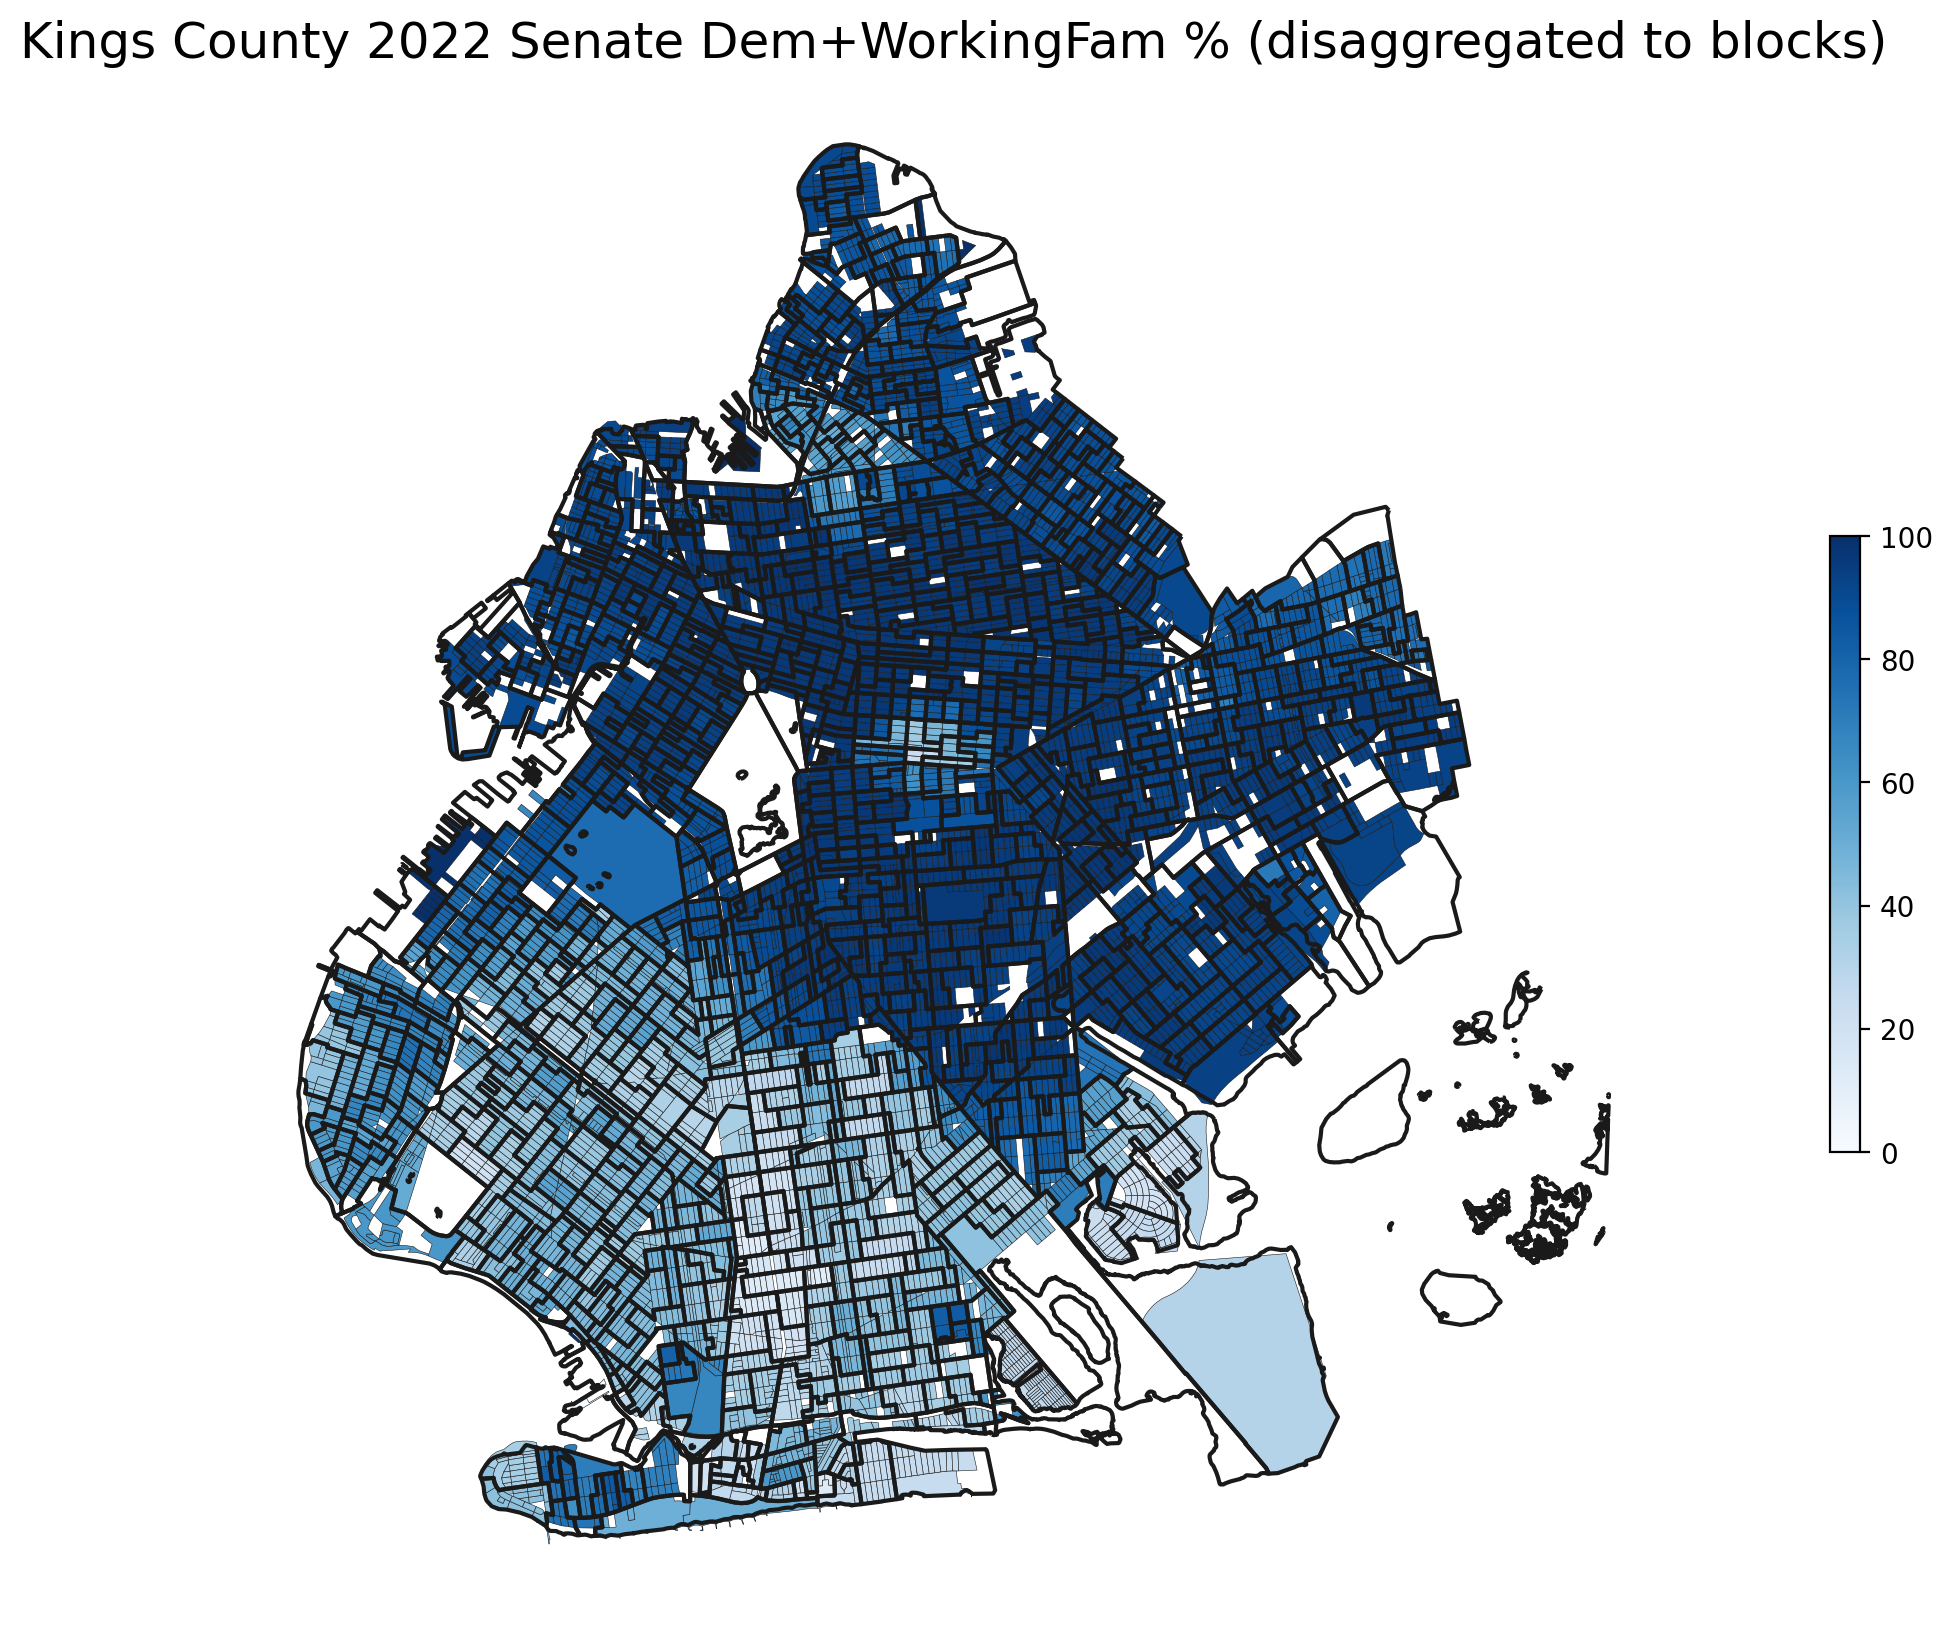

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')
ax.set_title(f"{county_name} 2022 Senate Dem+WorkingFam % (disaggregated to blocks)", fontsize=18)
county_block_with_election_gdf[~pd.isna(county_block_with_election_gdf["sen_demwor_pct"])].plot(
    ax=ax,
    column="sen_demwor_pct",
    vmin=0,
    vmax=100,
    **choropleth_style,
)
county_precinct_gdf.boundary.plot(
    ax=ax,
    edgecolor="0.1",
    linewidth=1.5,
)
plt.show()

Next, we'd like to shift this to the tract level instead of viewing by block.  This is not hard to do from the dataframe because tract IDs are contained within block IDs---they are just the first 11 characters out of 15.

In [23]:
aggregated_votes_df["tract"] = aggregated_votes_df.index.str.slice(0, 11)

In [24]:
aggregated_tract_votes_df = aggregated_votes_df.groupby("tract")[sen_columns].sum()
aggregated_tract_votes_df

USSen_DEM   USSen_WOR   USSen_REP  USSen_CON  USSen_LAR  \
tract                                                                    
36047000100  1558.538829  235.336135  193.901335   9.608714  16.835505   
36047000200    94.475314   20.346497   24.658869   2.680281   2.103785   
36047000301  1350.000408  224.601212  137.156974  12.057659   7.355531   
36047000501  1300.674395  204.873967  132.738919  16.264190   8.442001   
36047000502  1036.682356  192.875709  109.639555  10.454243   5.071409   
...                  ...         ...         ...        ...        ...   
36047121400   475.443191   17.181305   32.908541   0.727236   2.181708   
36047122000   856.156809   21.418695   53.891459   2.272764   3.818292   
36047123700   695.000000   53.000000  483.000000  30.000000   4.000000   
36047150200   689.393212  281.995395  149.535763  21.325280   4.882189   
36047152200   661.782647  285.433403   77.268361  11.369354   6.292375   

             USSen_Writ  USSen_total  
tract                                 
36047000100    1.755448  2015.975966  
36047000200    0.201089   144.465834  
36047000301    4.662339  1735.834122  
36047000501    6.183161  1669.176633  
36047000502    2.750711  1357.473983  
...                 ...          ...  
36047121400    0.000000   528.441982  
36047122000    2.000000   939.558018  
36047123700   15.000000  1280.000000  
36047150200    2.227259  1149.359099  
36047152200    4.532016  1046.678157  

[804 rows x 7 columns]

In [25]:
aggregated_tract_votes_df["sen_demwor_pct"] = (
    100 * aggregated_tract_votes_df[["USSen_DEM","USSen_WOR"]].sum(axis=1)
    / aggregated_tract_votes_df["USSen_total"]
)

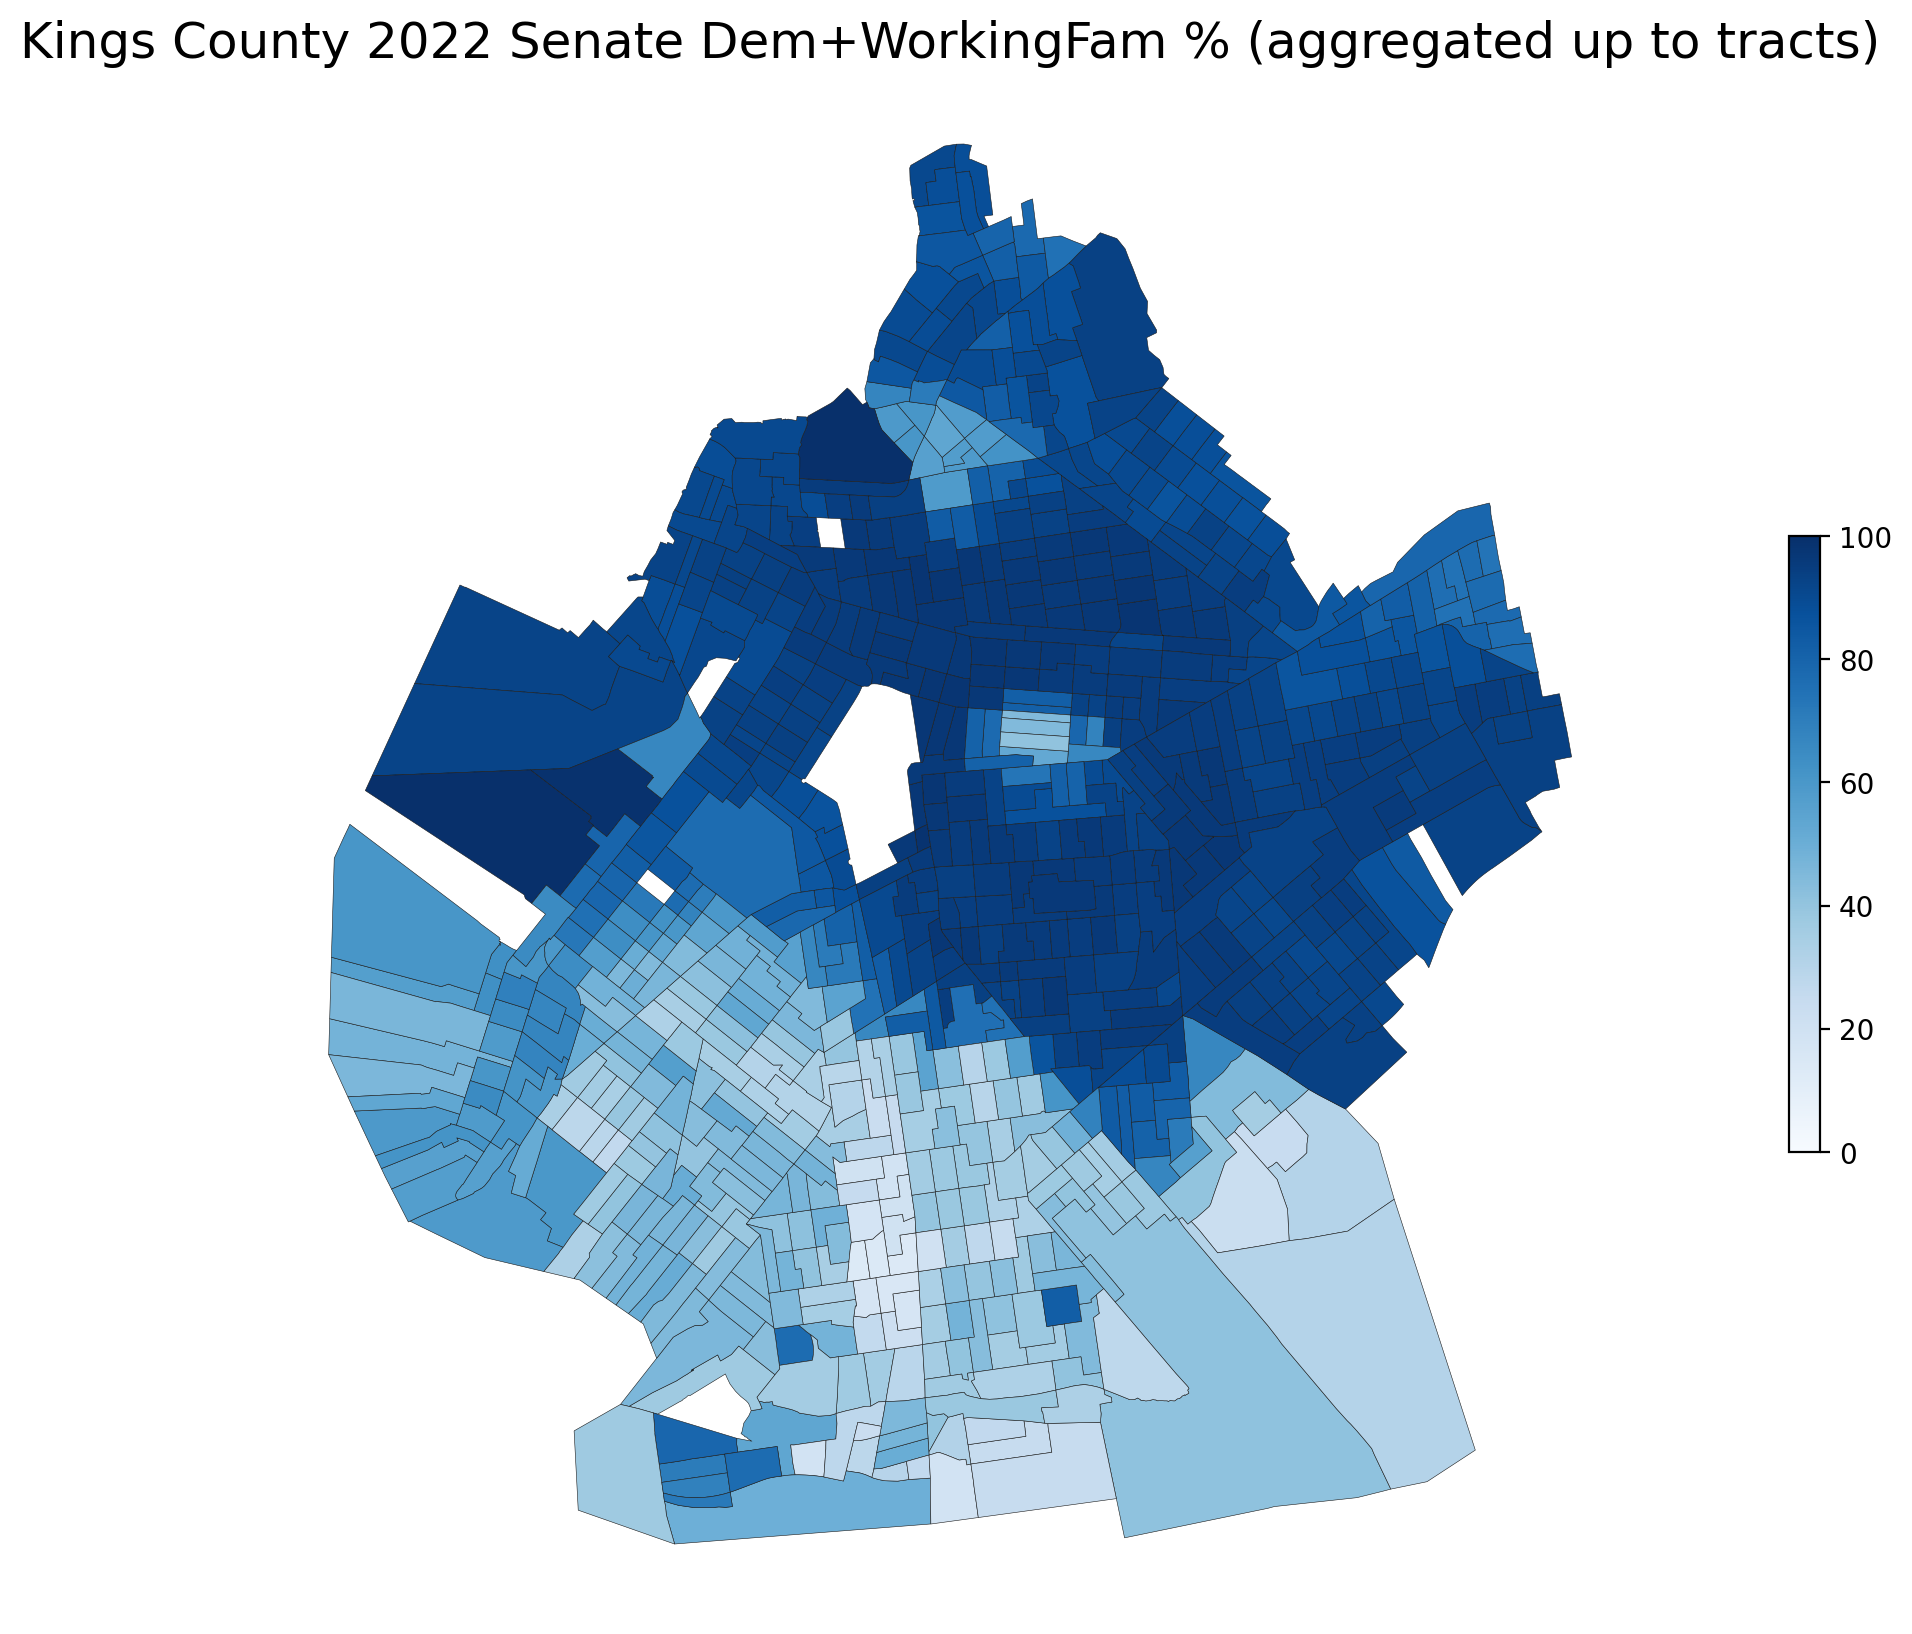

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')
ax.set_title(f"{county_name} 2022 Senate Dem+WorkingFam % (aggregated up to tracts)", fontsize=18)
county_tract_gdf.join(aggregated_tract_votes_df).plot(
    ax=ax,
    column="sen_demwor_pct",
    vmin=0,
    vmax=100,
    **choropleth_style,
)
plt.show()

Kind of interesting that the southern half of Brooklyn doesn't seem to have supported Chuck Schumer.  Let's see if that's predicted by age or income.

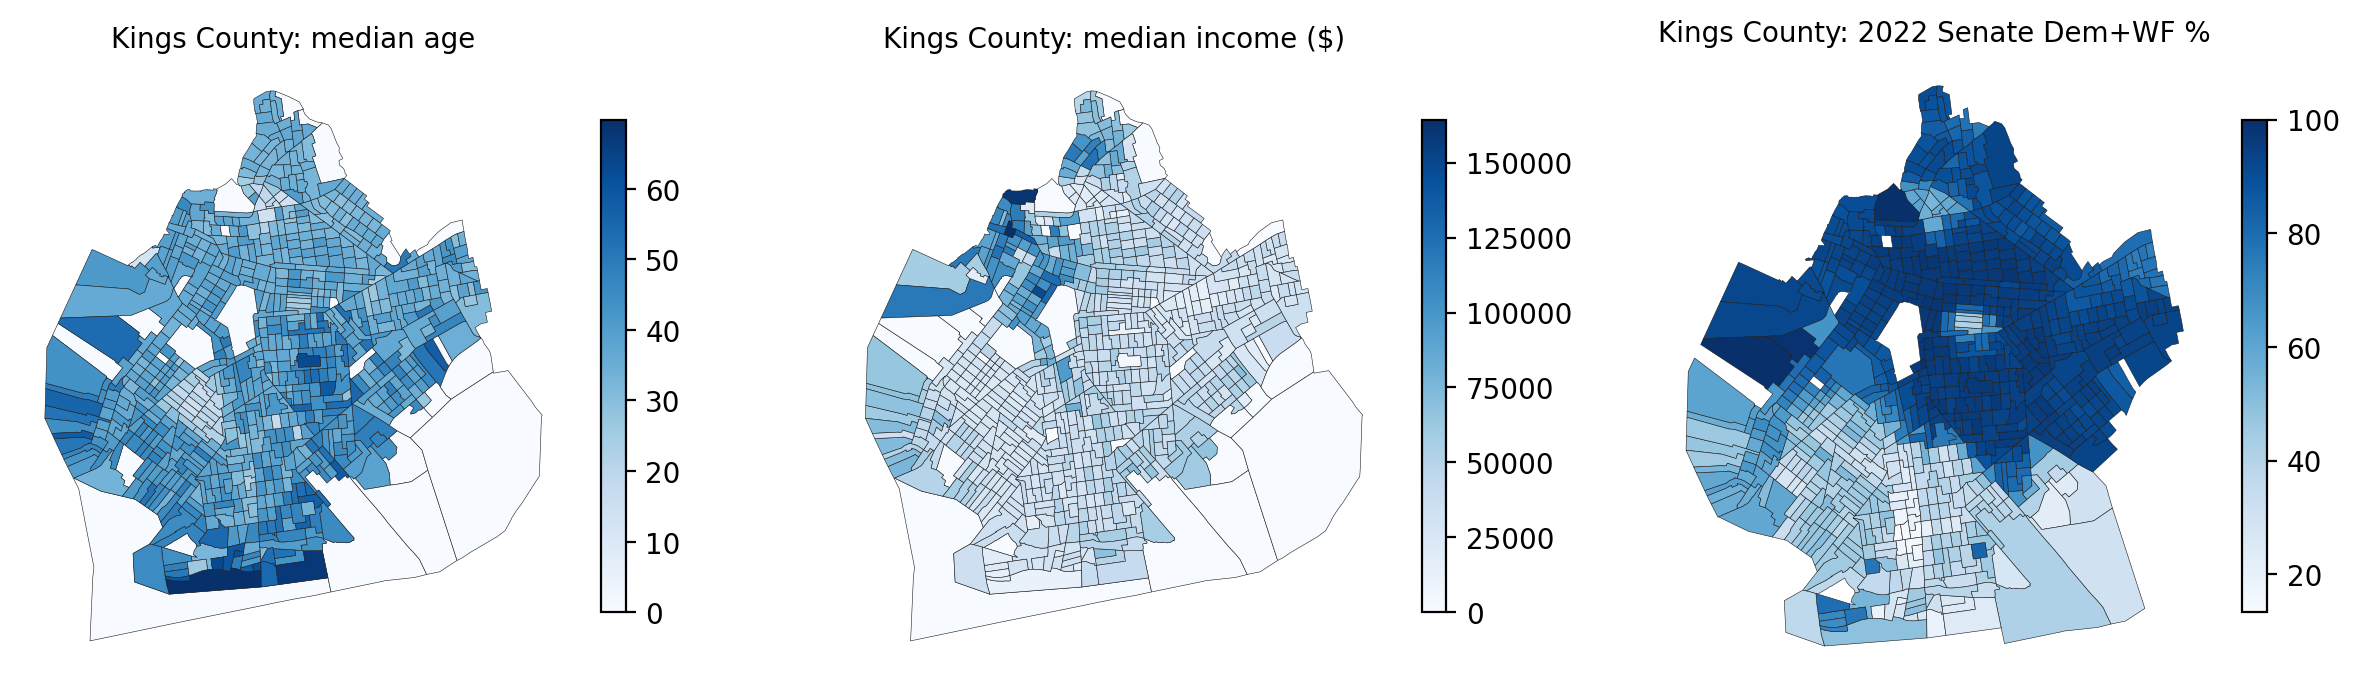

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes[0].axis('off')
axes[0].set_title(f"{county_name}: median age", fontsize=10)

county_tract_with_acs_gdf.plot(
    ax=axes[0],
    column="med_age",
    vmin=0,
    **choropleth_style,
)

axes[1].axis('off')
axes[1].set_title(f"{county_name}: median income ($)", fontsize=10)
county_tract_with_acs_gdf.plot(
    ax=axes[1],
    column="med_income",
    vmin=0,
    **choropleth_style,
)

axes[2].axis('off')
axes[2].set_title(f"{county_name}: 2022 Senate Dem+WF %", fontsize=10)
county_tract_gdf.join(aggregated_tract_votes_df).plot(
    ax=axes[2],
    column="sen_demwor_pct",
    **choropleth_style,
)
plt.show()

There's not a very strong visual correspondence there!  How about by race?

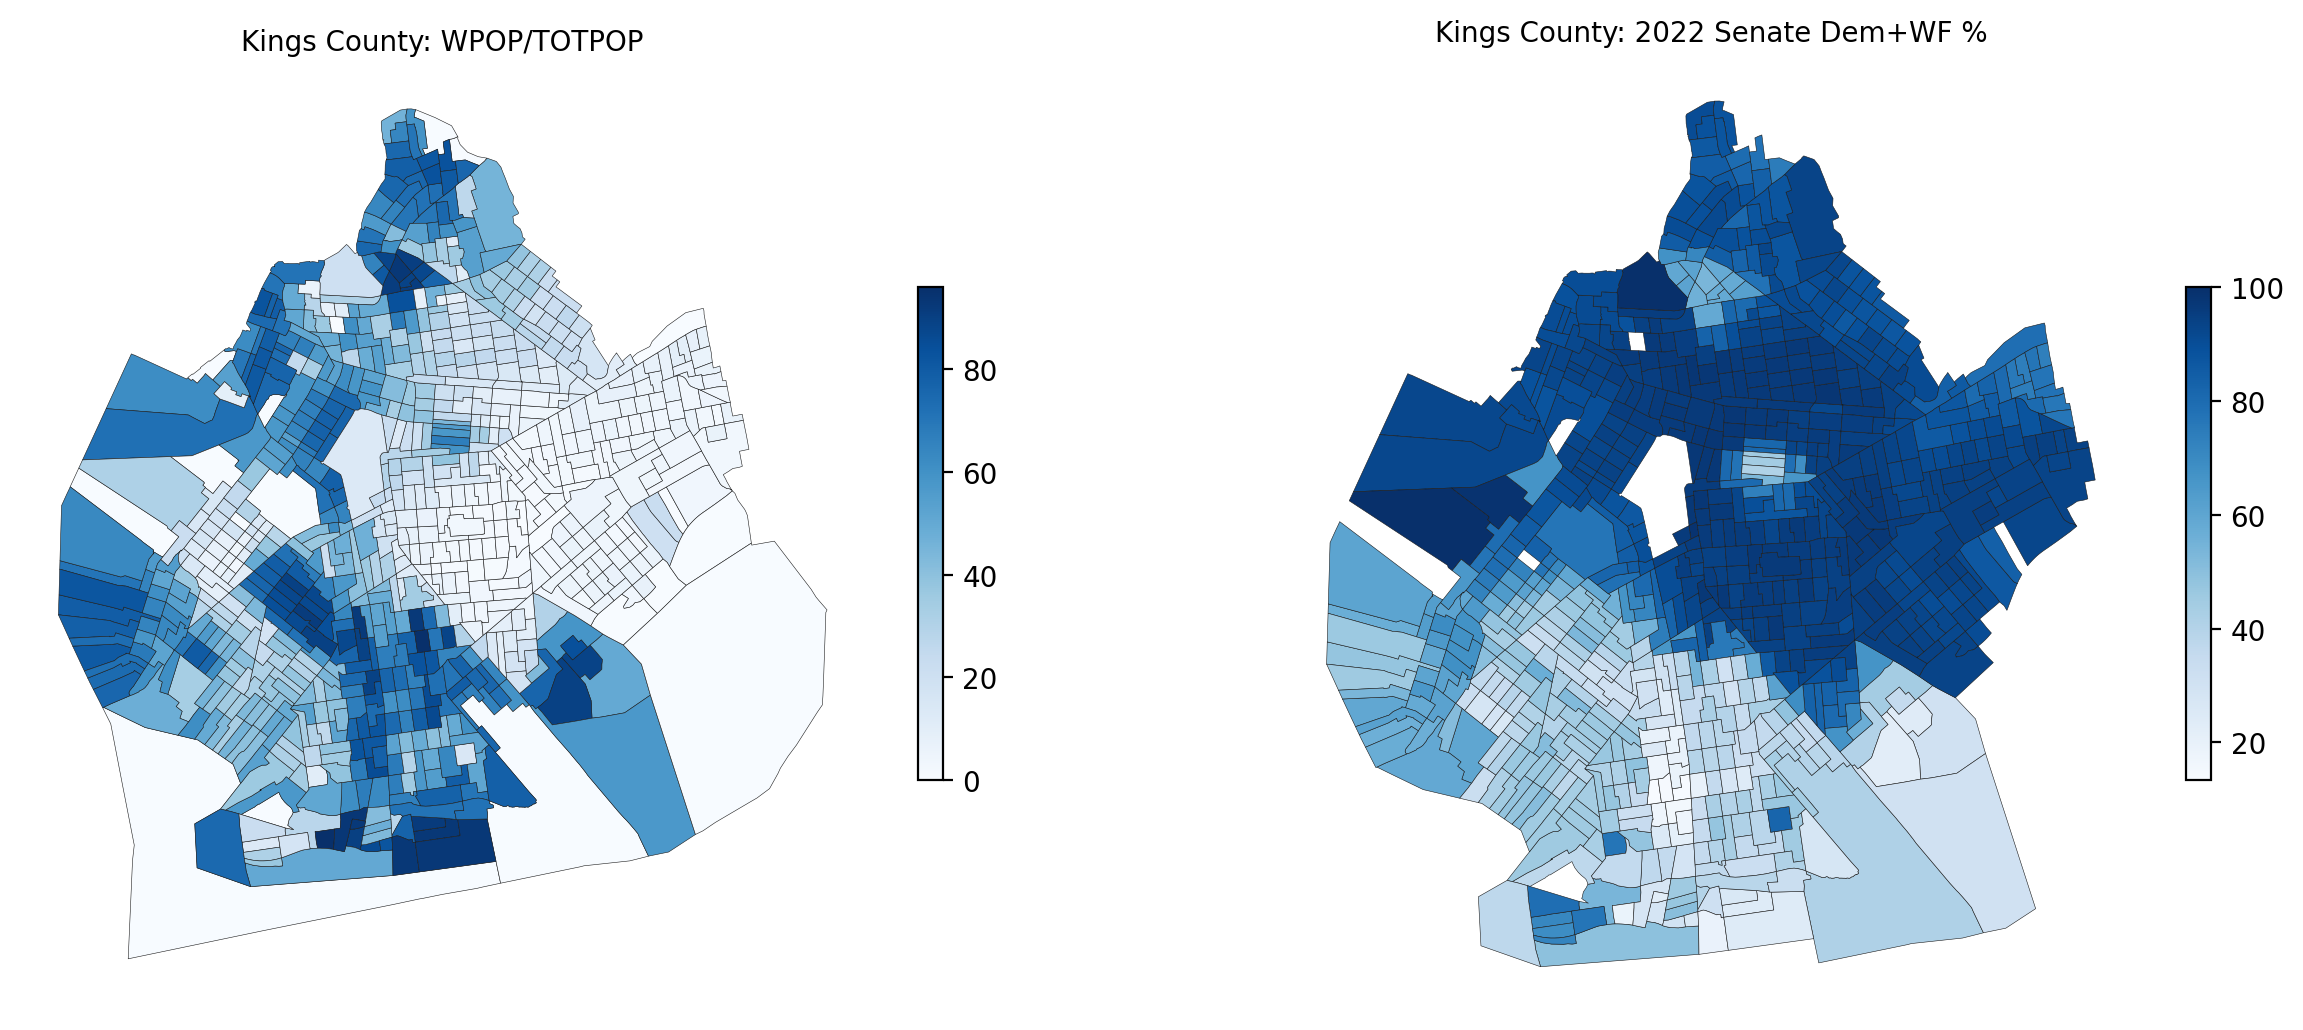

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].axis('off')
axes[0].set_title(f"{county_name}: WPOP/TOTPOP", fontsize=10)

county_tract_with_acs_gdf.plot(
    ax=axes[0],
    column="white_pct",
    vmin=0,
    **choropleth_style,
)



axes[1].axis('off')
axes[1].set_title(f"{county_name}: 2022 Senate Dem+WF %", fontsize=10)
county_tract_gdf.join(aggregated_tract_votes_df).plot(
    ax=axes[1],
    column="sen_demwor_pct",
    **choropleth_style,
)
plt.show()

That's a little more suggestive! Seems like a lot of White people did not vote for Schumer.  You could do a bit more digging to try to figure things out....

# Measuring Turnout in Massachusetts

Now we'll do a little detour into how shapefiles like this get put together.

In [1]:
!pip install maup census
!curl -OL https://github.com/PUBPOL-2130/notebooks/raw/refs/heads/main/data/25_block_2010_P3.zip
!unzip 25_block_2010_P3.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 38.6 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 2740k  100 2740k    0     0   860k      0  0:00:03  0:00:03 --:--:-- 3758k
Archive:  25_block_2010_P3.zip
  inflating: 25_block_2010_P3.csv    


In [2]:
from census import Census
import pandas as pd
import numpy as np
import geopandas as gpd
import maup

maup.progress.enabled = True

census = Census("", year=2010)

choropleth_style = dict(
    edgecolor="0.1",
    linewidth=0.2,
    cmap="Blues",
    legend=True,
    legend_kwds={'shrink': 0.4},
)

# Preparing the data

The next big chunk of the notebook is going through how to clean data from multiple sources to create a clean shapefile.  You can skip this in the interest of time, but it's a good thing to work through on your own.

We will be using the 2012 General election data from MA in this notebook.
To get the shapefile for this project, we can pull from the
[Massachusetts GIS Website](https://www.mass.gov/info-details/massgis-data-layers) and download the appropriate file for working with 2012 data (`wardsprecincts_poly.zip`) for our geodataframe.

In [3]:
ma_ward_precinct_gdf = gpd.read_file("https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/wardsprecincts_poly.zip")

In [4]:
ma_ward_precinct_gdf["TOWN"] = ma_ward_precinct_gdf["TOWN"].map(lambda x: x.title())
ma_ward_precinct_gdf = ma_ward_precinct_gdf[["TOWN", "WARD", "PRECINCT", "DISTRICT", "geometry"]]
ma_ward_precinct_gdf.rename(columns={"DISTRICT": "VTD"}, inplace=True)
ma_ward_precinct_gdf

TOWN  WARD PRECINCT   VTD  \
0     Braintree  None       5B    5B   
1     Braintree  None       6A    6A   
2     Braintree  None       6B    6B   
3       Chelsea     1        1   1-1   
4       Chelsea     1        2   1-2   
...         ...   ...      ...   ...   
2147     Boston     7        8   7-8   
2148     Boston    12        3  12-3   
2149     Boston    12        2  12-2   
2150     Boston    11        2  11-2   
2151     Boston    19        4  19-4   

                                               geometry  
0     POLYGON ((242364.517 883741.979, 242359.642 88...  
1     POLYGON ((243479.798 881994.897, 243477.538 88...  
2     POLYGON ((241614.364 881551.551, 241602.936 88...  
3     POLYGON ((239281.036 904133.287, 239277.513 90...  
4     POLYGON ((238408.578 904480.138, 238393.140 90...  
...                                                 ...  
2147  POLYGON ((236328.257 897806.825, 236339.793 89...  
2148  POLYGON ((234387.165 896770.015, 234357.873 89...  
2149  POLYGON ((234109.165 896499.623, 234101.151 89...  
2150  POLYGON ((233908.714 896981.859, 233743.883 89...  
2151  POLYGON ((232645.503 896432.326, 232621.204 89...  

[2152 rows x 5 columns]

Since the geometry is uniquely identified by the combination of the Town, Ward, and Precinct, we're going to make a column containing this information so that we can use it as an index later when we want to add election data.

In [5]:
ma_ward_precinct_gdf["Name"] = (
    ma_ward_precinct_gdf["TOWN"] +
    " Ward " + ma_ward_precinct_gdf["WARD"].astype(str) +
    " Precinct " + ma_ward_precinct_gdf["PRECINCT"].astype(str)
)

# Check to make sure that the Name column has as many unique names as there are
# entries in the dataframe
len(ma_ward_precinct_gdf["Name"].unique()) == len(ma_ward_precinct_gdf)

True

In [6]:
# Let's just look at the names really quick
ma_ward_precinct_gdf.Name

0       Braintree Ward None Precinct 5B
1       Braintree Ward None Precinct 6A
2       Braintree Ward None Precinct 6B
3             Chelsea Ward 1 Precinct 1
4             Chelsea Ward 1 Precinct 2
                     ...               
2147           Boston Ward 7 Precinct 8
2148          Boston Ward 12 Precinct 3
2149          Boston Ward 12 Precinct 2
2150          Boston Ward 11 Precinct 2
2151          Boston Ward 19 Precinct 4
Name: Name, Length: 2152, dtype: object

Now let's grab the election data. You can find this at the
[Massachusetts Election Data Page](https://electionstats.state.ma.us/elections/).

In [8]:
ma_elec_12_df = pd.read_csv("https://electionstats.state.ma.us/elections/download/112698/precincts_include:1/")
ma_elec_12_df

City/Town Ward  Pct Obama/ Biden Romney/ Ryan Johnson/ Gray  \
0          NaN  NaN  NaN   Democratic   Republican   Libertarian   
1     Abington    -    1          844          705             6   
2     Abington    -    2          742          741            18   
3     Abington    -    3          815          801            13   
4     Abington    -    4          899          904             8   
...        ...  ...  ...          ...          ...           ...   
2171  Yarmouth    -    4        1,056          909            10   
2172  Yarmouth    -    5          882          810            11   
2173  Yarmouth    -    6          924          826            13   
2174  Yarmouth    -    7        1,169        1,269            13   
2175    TOTALS  NaN  NaN    1,921,290    1,188,314        30,920   

     Stein/ Honkala All Others  No Preference  Blanks Total Votes Cast  
0     Green-Rainbow        NaN            NaN     NaN              NaN  
1                 7          4            0.0       5            1,571  
2                 8          4            0.0       7            1,520  
3                11          2            0.0       6            1,648  
4                 9          5            0.0       5            1,830  
...             ...        ...            ...     ...              ...  
2171              9          2            0.0      15            2,001  
2172              8          0            0.0       8            1,719  
2173             11          2            0.0       7            1,783  
2174             11          1            0.0       6            2,469  
2175         20,691      6,552            0.0  16,429        3,184,196  

[2176 rows x 11 columns]

Unfortunately, the nice election data that we got from the state's website doesn't quite match up with the state's shapefile-- for one thing, there are 2176 rows in the election file but only 2152 in the shapefile. This is actually very common, so let's see if we can figure out what is going on and if we can work with this data. We'll start by fixing up the data so that the data types are what we expect, and by making an index column for the election data in the same way that we did for the precinct data.

In [9]:
# Get rid of the first and last row since they do not follow the same format
# the if statement is so that you can rerun this cell if you want and it won't crash
if ma_elec_12_df.shape[0] == 2176:
    ma_elec_12_df.drop([0, 2175], inplace=True)

ma_elec_12_df.reset_index(drop=True, inplace=True)

# We also need to convert the election columns from strings into integers so we can add them up

columns_to_convert = [ # Names of the columns to convert
    "Obama/ Biden",
    "Romney/ Ryan",
    "Johnson/ Gray",
    "Stein/ Honkala",
    "All Others",
    "Blanks",
    "No Preference",
    "Total Votes Cast"
]

# Convert the columns
for col in columns_to_convert:
    new_col = []
    for val in ma_elec_12_df[col]:
        if isinstance(val, str):
            # get rid of commas and convert to int
            new_val = int(val.replace(",", ""))
        new_col.append(new_val)

    ma_elec_12_df[col] = new_col

# Fix the ward column so that it is consistent with the shapefile's ward column
new_col = []
for ward in ma_elec_12_df["Ward"]:
    if ward == "-":
        new_col.append("None")
    else:
        new_col.append(ward)
ma_elec_12_df["Ward"] = new_col

# Now make the new index column that will uniquely identify each precinct
ma_elec_12_df["Name"] = (
    ma_elec_12_df["City/Town"]
        + " Ward " + ma_elec_12_df["Ward"]
        + " Precinct " + ma_elec_12_df["Pct"].astype(str)
)
len(ma_elec_12_df["Name"].unique()) == ma_elec_12_df.shape[0]

True

In [10]:
# Let's take a look at the Name column to make sure things look like what we expect
ma_elec_12_df.Name

0       Abington Ward None Precinct 1
1       Abington Ward None Precinct 2
2       Abington Ward None Precinct 3
3       Abington Ward None Precinct 4
4       Abington Ward None Precinct 5
                    ...              
2169    Yarmouth Ward None Precinct 3
2170    Yarmouth Ward None Precinct 4
2171    Yarmouth Ward None Precinct 5
2172    Yarmouth Ward None Precinct 6
2173    Yarmouth Ward None Precinct 7
Name: Name, Length: 2174, dtype: object

Let's find the discrepancies. We'll start by listing precinct names that are found in the election data but not in the shapefile.  We do that by taking a *set difference*.  

In [11]:
# Print out the names that are in the election data but not in the ward precinct data
# The "set" function will give you the unique names in the list and subtracting the
# two sets will give you the names that are in the first set but not the second
set(ma_elec_12_df.Name) - set(ma_ward_precinct_gdf.Name)

{'Andover Ward None Precinct 7A',
 'Andover Ward None Precinct 9A',
 'Bellingham Ward None Precinct 4A',
 'Cambridge Ward 3 Precinct 2A',
 'Chicopee Ward 6 Precinct AN',
 'Chicopee Ward 6 Precinct AS',
 'Chicopee Ward 6 Precinct BE',
 'Chicopee Ward 6 Precinct BW',
 'Dracut Ward None Precinct 6A',
 'E. Bridgewater Ward None Precinct 1',
 'E. Bridgewater Ward None Precinct 2',
 'E. Bridgewater Ward None Precinct 3',
 'E. Bridgewater Ward None Precinct 4',
 'E. Brookfield Ward None Precinct 1',
 'E. Longmeadow Ward None Precinct 1',
 'E. Longmeadow Ward None Precinct 2',
 'E. Longmeadow Ward None Precinct 3',
 'E. Longmeadow Ward None Precinct 4',
 'Fall River Ward 5 Precinct B1',
 'Fall River Ward 6 Precinct C1',
 'Hingham Ward None Precinct 5A',
 'Manchester-by-the-Sea Ward None Precinct 1',
 'N. Adams Ward 1 Precinct 1',
 'N. Adams Ward 2 Precinct 2',
 'N. Adams Ward 3 Precinct 3',
 'N. Adams Ward 4 Precinct 4',
 'N. Adams Ward 5 Precinct 5',
 'N. Andover Ward None Precinct 1',
 'N. A

Now the reverse.

In [12]:
# Print out the names that are in the ward precinct data but not in the election data
set(ma_ward_precinct_gdf.Name) - set(ma_elec_12_df.Name)

{'Chicopee Ward 6 Precinct A',
 'Chicopee Ward 6 Precinct B',
 'East Bridgewater Ward None Precinct 1',
 'East Bridgewater Ward None Precinct 2',
 'East Bridgewater Ward None Precinct 3',
 'East Bridgewater Ward None Precinct 4',
 'East Brookfield Ward None Precinct 1',
 'East Longmeadow Ward None Precinct 1',
 'East Longmeadow Ward None Precinct 2',
 'East Longmeadow Ward None Precinct 3',
 'East Longmeadow Ward None Precinct 4',
 'Manchester Ward None Precinct 1',
 'North Adams Ward 1 Precinct 1',
 'North Adams Ward 2 Precinct 2',
 'North Adams Ward 3 Precinct 3',
 'North Adams Ward 4 Precinct 4',
 'North Adams Ward 5 Precinct 5',
 'North Andover Ward None Precinct 1',
 'North Andover Ward None Precinct 2',
 'North Andover Ward None Precinct 3',
 'North Andover Ward None Precinct 4',
 'North Andover Ward None Precinct 5',
 'North Andover Ward None Precinct 6',
 'North Andover Ward None Precinct 7',
 'North Andover Ward None Precinct 8',
 'North Attleborough Ward None Precinct 1',
 'N

One thing that's clear is that E. corresponds to East, N. to North, and so on, making sure we still have 2174 precincts after the renaming.

In [13]:
def fix_city_town(x):
    if "E." in x:
        return x.replace("E. ", "East ")
    elif "W." in x:
        return x.replace("W. ", "West ")
    elif "N." in x:
        return x.replace("N. ", "North ")
    elif "S." in x:
        return x.replace("S. ", "South ")
    return x

# Fix the city/town names
new_city_town = []
for city_town in ma_elec_12_df["City/Town"]:
    new_city_town.append(fix_city_town(city_town))
ma_elec_12_df["City/Town"] = new_city_town

ma_elec_12_df["Name"] = (
    ma_elec_12_df["City/Town"]
    + " Ward " + ma_elec_12_df["Ward"]
    + " Precinct " + ma_elec_12_df["Pct"].astype(str)
)
len(ma_elec_12_df["Name"].unique())

2174

What's left?

In [14]:
# Print out the names that are in the election data but not in the ward precinct data
set(ma_elec_12_df.Name) - set(ma_ward_precinct_gdf.Name)

{'Andover Ward None Precinct 7A',
 'Andover Ward None Precinct 9A',
 'Bellingham Ward None Precinct 4A',
 'Cambridge Ward 3 Precinct 2A',
 'Chicopee Ward 6 Precinct AN',
 'Chicopee Ward 6 Precinct AS',
 'Chicopee Ward 6 Precinct BE',
 'Chicopee Ward 6 Precinct BW',
 'Dracut Ward None Precinct 6A',
 'Fall River Ward 5 Precinct B1',
 'Fall River Ward 6 Precinct C1',
 'Hingham Ward None Precinct 5A',
 'Manchester-by-the-Sea Ward None Precinct 1',
 'Newburyport Ward 1 Precinct P',
 'Palmer Ward None Precinct 1A',
 'Peabody Ward 4 Precinct 3A',
 'Quincy Ward 2 Precinct 3A',
 'Raynham Ward None Precinct 1A',
 'Raynham Ward None Precinct 2A',
 'Revere Ward 2 Precinct 3A',
 'Revere Ward 5 Precinct 1A',
 'Revere Ward 5 Precinct 2A',
 'Sudbury Ward None Precinct 1A',
 'Warren Ward None Precinct B',
 'Winchendon Ward None Precinct 1A'}

In [15]:
# Print out the names that are in the ward precinct data but not in the election data
set(ma_ward_precinct_gdf.Name) - set(ma_elec_12_df.Name)

{'Chicopee Ward 6 Precinct A',
 'Chicopee Ward 6 Precinct B',
 'Manchester Ward None Precinct 1'}

Really, we should contact one of the election officials at this point
and ask them how to aggregate this data, but for the purposes of this example, we are going to do
some natural language processing ourselves to get the data ready for use with `maup`.  We'll use our best judgment and make educated guesses that names that got more specific (like Andover Precinct 7A where there used to just be a 7) are subdivisions, so it's safe to send votes from 7A in the tabular data to 7 in the shapefile.

This produces a dictionary of fixes, and drops the number of precincts down to 2154.

In [16]:
def fix_name(x):
    fix_dictionary = {
        'Andover Ward None Precinct 7A':"Andover Ward None Precinct 7",
        'Andover Ward None Precinct 9A':"Andover Ward None Precinct 9",
        'Bellingham Ward None Precinct 4A':"Bellingham Ward None Precinct 4",
        'Cambridge Ward 3 Precinct 2A':"Cambridge Ward 3 Precinct 2",
        'Chicopee Ward 6 Precinct AN':"Chicopee Ward 6 Precinct A",
        'Chicopee Ward 6 Precinct AS':"Chicopee Ward 6 Precinct A",
        'Chicopee Ward 6 Precinct BE':"Chicopee Ward 6 Precinct B",
        'Chicopee Ward 6 Precinct BW':"Chicopee Ward 6 Precinct B",
        'Dracut Ward None Precinct 6A':"Dracut Ward None Precinct 6",
        'Fall River Ward 5 Precinct B1':"Fall River Ward 5 Precinct B",
        'Fall River Ward 6 Precinct C1':"Fall River Ward 6 Precinct C",
        'Hingham Ward None Precinct 5A':"Hingham Ward None Precinct 5",
        'Manchester-by-the-Sea Ward None Precinct 1':"Manchester Ward None Precinct 1",
        'Palmer Ward None Precinct 1A':"Palmer Ward None Precinct 1",
        'Peabody Ward 4 Precinct 3A':"Peabody Ward 4 Precinct 3",
        'Quincy Ward 2 Precinct 3A':"Quincy Ward 2 Precinct 3",
        'Raynham Ward None Precinct 1A':"Raynham Ward None Precinct 1",
        'Raynham Ward None Precinct 2A':"Raynham Ward None Precinct 2",
        'Revere Ward 2 Precinct 3A':"Revere Ward 2 Precinct 3",
        'Revere Ward 5 Precinct 1A':"Revere Ward 5 Precinct 1",
        'Revere Ward 5 Precinct 2A':"Revere Ward 5 Precinct 2",
        'Sudbury Ward None Precinct 1A':"Sudbury Ward None Precinct 1",
        'Winchendon Ward None Precinct 1A':"Winchendon Ward None Precinct 1",
    }

    # The dictionary.get(x, y) pattern says "get the value for x in the dictionary if it
    # exists in the keys, otherwise return y"
    return fix_dictionary.get(x, x)


new_name_col = []
for name in ma_elec_12_df["Name"]:
    new_name_col.append(fix_name(name))

ma_elec_12_df["Name"] = new_name_col
len(ma_elec_12_df["Name"].unique())

2154

That gets us down to just two ambiguous cases, and with a little more sleuthing we can just merge those in with best matching precincts.

In [17]:
def fix_name_part2(x):
    fix_dictionary = {
        'Warren Ward None Precinct B': "Warren Ward None Precinct A",
        'Newburyport Ward 1 Precinct P': "Newburyport Ward 1 Precinct 1",
    }

    return fix_dictionary.get(x, x)


# Make sure to do this AFTER running the first fix_name function
new_name_col = []
for name in ma_elec_12_df["Name"]:
    new_name_col.append(fix_name_part2(name))

ma_elec_12_df["Name"] = new_name_col
len(ma_elec_12_df["Name"].unique())

2152

Let's check that everything matches now!

In [18]:
# Now we sanity-check that the names are the same
set(ma_elec_12_df.Name.unique()) == set(ma_ward_precinct_gdf.Name.unique())

True

Now we'll group by "name" and drop the extraneous columns.

In [19]:
condensed_ma_elec_12_df = ma_elec_12_df.groupby("Name").sum().drop(["City/Town", "Ward", "Pct"], axis=1)
condensed_ma_elec_12_df

Obama/ Biden  Romney/ Ryan  Johnson/ Gray  \
Name                                                                       
Abington Ward None Precinct 1           844           705              6   
Abington Ward None Precinct 2           742           741             18   
Abington Ward None Precinct 3           815           801             13   
Abington Ward None Precinct 4           899           904              8   
Abington Ward None Precinct 5           844           910              8   
...                                     ...           ...            ...   
Yarmouth Ward None Precinct 3           860           694             11   
Yarmouth Ward None Precinct 4          1056           909             10   
Yarmouth Ward None Precinct 5           882           810             11   
Yarmouth Ward None Precinct 6           924           826             13   
Yarmouth Ward None Precinct 7          1169          1269             13   

                               Stein/ Honkala  All Others  No Preference  \
Name                                                                       
Abington Ward None Precinct 1               7           4              6   
Abington Ward None Precinct 2               8           4              6   
Abington Ward None Precinct 3              11           2              6   
Abington Ward None Precinct 4               9           5              6   
Abington Ward None Precinct 5               2           5              6   
...                                       ...         ...            ...   
Yarmouth Ward None Precinct 3              13           5              6   
Yarmouth Ward None Precinct 4               9           2              6   
Yarmouth Ward None Precinct 5               8           0              6   
Yarmouth Ward None Precinct 6              11           2              6   
Yarmouth Ward None Precinct 7              11           1              6   

                               Blanks  Total Votes Cast  
Name                                                     
Abington Ward None Precinct 1       5              1571  
Abington Ward None Precinct 2       7              1520  
Abington Ward None Precinct 3       6              1648  
Abington Ward None Precinct 4       5              1830  
Abington Ward None Precinct 5       5              1774  
...                               ...               ...  
Yarmouth Ward None Precinct 3       8              1591  
Yarmouth Ward None Precinct 4      15              2001  
Yarmouth Ward None Precinct 5       8              1719  
Yarmouth Ward None Precinct 6       7              1783  
Yarmouth Ward None Precinct 7       6              2469  

[2152 rows x 8 columns]

In [20]:
# We set the index to be the "Name" column so that we can use it to merge with the
# condensed_ma_elec_12_df dataframe. Importantly, we now know that these indices are
# the same!!
ma_ward_precinct_gdf.set_index("Name", inplace=True)

In [21]:
ma_ward_precinct_gdf["Dem Votes"] = condensed_ma_elec_12_df["Obama/ Biden"]
ma_ward_precinct_gdf["Rep Votes"] = condensed_ma_elec_12_df["Romney/ Ryan"]
ma_ward_precinct_gdf["Total Votes"] = condensed_ma_elec_12_df["Total Votes Cast"]
ma_ward_precinct_gdf

TOWN  WARD PRECINCT   VTD  \
Name                                                              
Braintree Ward None Precinct 5B  Braintree  None       5B    5B   
Braintree Ward None Precinct 6A  Braintree  None       6A    6A   
Braintree Ward None Precinct 6B  Braintree  None       6B    6B   
Chelsea Ward 1 Precinct 1          Chelsea     1        1   1-1   
Chelsea Ward 1 Precinct 2          Chelsea     1        2   1-2   
...                                    ...   ...      ...   ...   
Boston Ward 7 Precinct 8            Boston     7        8   7-8   
Boston Ward 12 Precinct 3           Boston    12        3  12-3   
Boston Ward 12 Precinct 2           Boston    12        2  12-2   
Boston Ward 11 Precinct 2           Boston    11        2  11-2   
Boston Ward 19 Precinct 4           Boston    19        4  19-4   

                                                                          geometry  \
Name                                                                                 
Braintree Ward None Precinct 5B  POLYGON ((242364.517 883741.979, 242359.642 88...   
Braintree Ward None Precinct 6A  POLYGON ((243479.798 881994.897, 243477.538 88...   
Braintree Ward None Precinct 6B  POLYGON ((241614.364 881551.551, 241602.936 88...   
Chelsea Ward 1 Precinct 1        POLYGON ((239281.036 904133.287, 239277.513 90...   
Chelsea Ward 1 Precinct 2        POLYGON ((238408.578 904480.138, 238393.140 90...   
...                                                                            ...   
Boston Ward 7 Precinct 8         POLYGON ((236328.257 897806.825, 236339.793 89...   
Boston Ward 12 Precinct 3        POLYGON ((234387.165 896770.015, 234357.873 89...   
Boston Ward 12 Precinct 2        POLYGON ((234109.165 896499.623, 234101.151 89...   
Boston Ward 11 Precinct 2        POLYGON ((233908.714 896981.859, 233743.883 89...   
Boston Ward 19 Precinct 4        POLYGON ((232645.503 896432.326, 232621.204 89...   

                                 Dem Votes  Rep Votes  Total Votes  
Name                                                                
Braintree Ward None Precinct 5B        857        851         1737  
Braintree Ward None Precinct 6A        916       1035         1981  
Braintree Ward None Precinct 6B        862        823         1729  
Chelsea Ward 1 Precinct 1              410         93          515  
Chelsea Ward 1 Precinct 2              255         36          305  
...                                    ...        ...          ...  
Boston Ward 7 Precinct 8               468        191          690  
Boston Ward 12 Precinct 3              713         16          734  
Boston Ward 12 Precinct 2             1406         13         1425  
Boston Ward 11 Precinct 2              980         23         1014  
Boston Ward 19 Precinct 4             1068         66         1196  

[2152 rows x 8 columns]

#Preparing the geometries

Our goal below is going to be figuring out turnout across Massachusetts, so we'll look at the presidential votes cast as a share of adult citizens.  Citizenship is available in a statistic called CVAP that is available from the ACS on tracts.  We're going to need to get data onto the same geometries, and we're going to break it down according to VAP, which we have on blocks.

We'll start by getting that VAP onto blocks.  This can be passed over in Lab, but you might want to read through it on your own.

Load the block file.  (May take a minute in Colab.)

In [22]:
# this will take some time to finish
ma_2010_census_blocks_gdf = gpd.read_file(
    "https://www2.census.gov/geo/tiger/TIGER2010/TABBLOCK/2010/tl_2010_25_tabblock10.zip"
)

In [23]:
# We set the index to the GEOID10 column since it is the unique identifier for each block geometry
ma_2010_census_blocks_gdf.set_index("GEOID10", inplace=True)
# Before we proceed, we need to make sure the block data and the ward precinct data
# are in the same coordinate reference system (CRS)
ma_2010_census_blocks_gdf.to_crs(ma_ward_precinct_gdf.crs, inplace=True)

Now we figure out which blocks are in each precinct.

In [24]:
block_to_precinct_assignment = maup.assign(
    ma_2010_census_blocks_gdf, ma_ward_precinct_gdf
)

100%|██████████| 2152/2152 [00:18<00:00, 117.92it/s]


## A bit more cleaning

In these collapsed cells, we check for unassigned blocks, figure out that they're water, confirm they have no population, and drop them!  Check out the details if you are curious.

Unfortunately, there can be some blocks not part of any precinct!

In [25]:
# Let's just check and make sure that we didn't lose any blocks (assign them to nothing)
block_to_precinct_assignment.isna().sum()

603

Let's add an assignment column, which will come in handy later.

In [26]:
# We will need this column to help us graph things more easily, and it will help us
# filter out bad assignments later
ma_2010_census_blocks_gdf["assignment"] = block_to_precinct_assignment

Now we visually inspect the unassigned blocks.  (This takes a minute.)

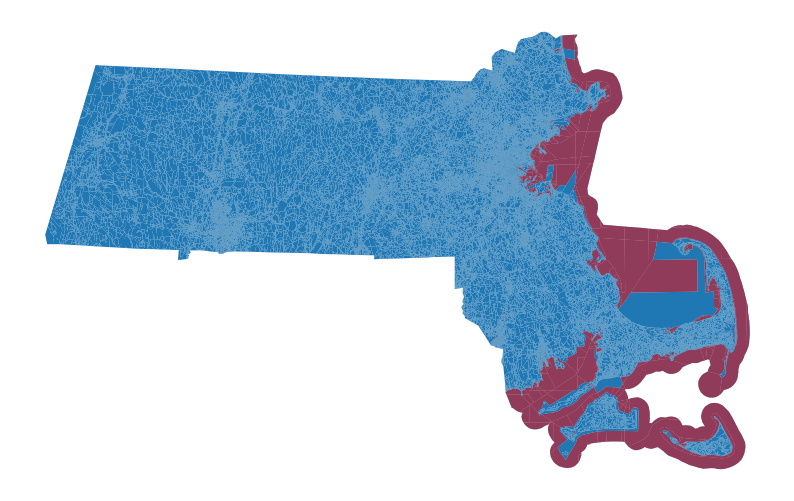

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

ax = ma_2010_census_blocks_gdf.plot(ax=ax)

# The following line takes things that are labeled "na" and colors them red
ax = ma_2010_census_blocks_gdf[ma_2010_census_blocks_gdf["assignment"].isna()].plot(ax=ax, color="red", alpha=0.5)

# The following lines just get rid of the axes and the border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Confirmed -- the red stuff (unassigned) appears to be water.  Let's check it has no population.  First, sum the VAP in the state.

In [28]:
# We are going to make a new dataframe that will contain the VAP for each block.
# Note: We are not using the census API for this right now because there appear to
# be some issues with the Census servers not responding to requests for block level
# population data from 2010. Luckily, we have a saved copy of that data that we can use.
census_2010_p3_block_df = pd.read_csv("25_block_2010_P3.csv").set_index("id")
# Convert the index to a string type so that it plays well with the block_to_precinct_assignment
census_2010_p3_block_df.index = census_2010_p3_block_df.index.astype(str)

# Get only the column containing the VAP and convert it to an int
census_2010_p3_block_df = census_2010_p3_block_df[["p003001"]]
census_2010_p3_block_df["p003001"] = census_2010_p3_block_df["p003001"].astype(int)

# Change the name of the column so that it is easier to work with moving forward
census_2010_p3_block_df.rename(columns={"p003001": "VAP"}, inplace=True)
# Identify the rows by their unique geometric identifier
census_2010_p3_block_df.rename_axis("GEOID10", inplace=True)

census_2010_p3_block_df["VAP"].sum()

5128706

Now, sum the VAP in the unassigned blocks.

In [29]:
census_2010_p3_block_df["assignment"] = block_to_precinct_assignment.astype(str)

# We want the following line to be 0!
census_2010_p3_block_df[census_2010_p3_block_df["assignment"].isna()]["VAP"].sum()

0

Now we can filter those out.

In [30]:
# The call ma_2010_census_blocks_gdf["assignment"].isna() returns a boolean series and
# the "~" is the "not" operator. So this bit of code selects all of the rows that are NOT "na"
ma_2010_filtered_block_gdf = ma_2010_census_blocks_gdf.loc[~ma_2010_census_blocks_gdf["assignment"].isna()]

# Citizenship data

We have election data, we have good block and precinct geometries, now it's time to get the CVAP data, prorate it down to the block level, and then aggregate it back up to the precincts so that we can actually do some election analysis.  

The ACS doesn't make this super easy -- it's split out by American-born and foreign-born, and by female and male.

In [31]:
# ACS data
acs5_column_names = {
    "B05003_009E": "Male_Native_CVAP",
    "B05003_011E": "Male_Foreign_Born_Naturalized_CVAP",
    "B05003_020E": "Female_Native_CVAP",
    "B05003_022E": "Female_Foreign_Born_Naturalized_CVAP"
}


acs5_2012_df = pd.DataFrame(census.acs5.get(
    ("B05003_009E", "B05003_011E", "B05003_020E", "B05003_022E"),
    geo={
        "for": "tract:*",
        "in": "state:25"
    },
    year=2012
))


# Get rid of the horrible census column names
acs5_2012_df.rename(columns=acs5_column_names, inplace=True)

acs5_2012_df

Male_Native_CVAP  Male_Foreign_Born_Naturalized_CVAP  \
0               2096.0                               117.0   
1               2711.0                               129.0   
2               2589.0                                56.0   
3               1545.0                                26.0   
4                454.0                               178.0   
...                ...                                 ...   
1473            1396.0                                66.0   
1474            1395.0                                67.0   
1475            1221.0                                50.0   
1476            1445.0                               120.0   
1477            2037.0                                39.0   

      Female_Native_CVAP  Female_Foreign_Born_Naturalized_CVAP state county  \
0                 2369.0                                 138.0    25    009   
1                 2800.0                                  73.0    25    009   
2                 3019.0                                 103.0    25    009   
3                 1303.0                                  15.0    25    009   
4                  438.0                                 421.0    25    009   
...                  ...                                   ...   ...    ...   
1473              1057.0                                 111.0    25    017   
1474              1323.0                                 111.0    25    017   
1475              1604.0                                  26.0    25    017   
1476              1801.0                                 185.0    25    017   
1477              2432.0                                  75.0    25    023   

       tract  
0     210500  
1     213100  
2     217100  
3     223200  
4     250400  
...      ...  
1473  350900  
1474  353300  
1475  301101  
1476  353600  
1477  525104  

[1478 rows x 7 columns]

Add things up.

In [32]:
# Make the CVAP column which is the sum of the columns we are interested in (the values
# in our `acs5_column_names` dictionary)
acs5_2012_df["CVAP"] = acs5_2012_df[list(acs5_column_names.values())].sum(axis=1)

Make a unique identifier.

In [33]:
# Be careful: you need "state", "county", and "tract" together to make a unique key for
# each tract (there are some counties that have the contain tracts with the same tract number)
acs5_2012_df["geo_id"] = acs5_2012_df["state"] + acs5_2012_df["county"] + acs5_2012_df["tract"]
acs5_2012_df.set_index("geo_id", inplace=True)
acs5_2012_df

Male_Native_CVAP  Male_Foreign_Born_Naturalized_CVAP  \
geo_id                                                              
25009210500            2096.0                               117.0   
25009213100            2711.0                               129.0   
25009217100            2589.0                                56.0   
25009223200            1545.0                                26.0   
25009250400             454.0                               178.0   
...                       ...                                 ...   
25017350900            1396.0                                66.0   
25017353300            1395.0                                67.0   
25017301101            1221.0                                50.0   
25017353600            1445.0                               120.0   
25023525104            2037.0                                39.0   

             Female_Native_CVAP  Female_Foreign_Born_Naturalized_CVAP state  \
geo_id                                                                        
25009210500              2369.0                                 138.0    25   
25009213100              2800.0                                  73.0    25   
25009217100              3019.0                                 103.0    25   
25009223200              1303.0                                  15.0    25   
25009250400               438.0                                 421.0    25   
...                         ...                                   ...   ...   
25017350900              1057.0                                 111.0    25   
25017353300              1323.0                                 111.0    25   
25017301101              1604.0                                  26.0    25   
25017353600              1801.0                                 185.0    25   
25023525104              2432.0                                  75.0    25   

            county   tract    CVAP  
geo_id                              
25009210500    009  210500  4720.0  
25009213100    009  213100  5713.0  
25009217100    009  217100  5767.0  
25009223200    009  223200  2889.0  
25009250400    009  250400  1491.0  
...            ...     ...     ...  
25017350900    017  350900  2630.0  
25017353300    017  353300  2896.0  
25017301101    017  301101  2901.0  
25017353600    017  353600  3551.0  
25023525104    023  525104  4583.0  

[1478 rows x 8 columns]

In [34]:
# We made a filtered geodataframe earlier, but we never filtered the P3 table, so let's do that now
census_2010_p3_filtered_block_df = census_2010_p3_block_df.loc[~census_2010_p3_block_df["assignment"].isna()]
census_2010_p3_filtered_block_df

VAP                         assignment
GEOID10                                                
250010101001000    0                                nan
250010101001001    0  Provincetown Ward None Precinct 1
250010101001002    0  Provincetown Ward None Precinct 1
250010101001003    0  Provincetown Ward None Precinct 1
250010101001004    0  Provincetown Ward None Precinct 1
...              ...                                ...
250277614006198    0       Harvard Ward None Precinct 1
250277614006199    0       Harvard Ward None Precinct 1
250277614006200    0       Harvard Ward None Precinct 1
250277614006201    0       Harvard Ward None Precinct 1
250277614006202    0       Harvard Ward None Precinct 1

[157508 rows x 2 columns]

Same as before, chop the GEOID to get tracts.

In [35]:
# We are now going to make a new column that will contain the tract-level geo-id for each
# block. Since both track and block are on the central spine of the census geometric hierarchy,
# we can just take the first 11 characters of the block geo-id to get the tract geo-id consistent
# with the geo_id of the acs5_2012_df dataframe
census_2010_p3_filtered_block_df["tract_geo_id"] = census_2010_p3_filtered_block_df.index.map(lambda x: x[:11])
census_2010_p3_filtered_block_df

VAP                         assignment tract_geo_id
GEOID10                                                             
250010101001000    0                                nan  25001010100
250010101001001    0  Provincetown Ward None Precinct 1  25001010100
250010101001002    0  Provincetown Ward None Precinct 1  25001010100
250010101001003    0  Provincetown Ward None Precinct 1  25001010100
250010101001004    0  Provincetown Ward None Precinct 1  25001010100
...              ...                                ...          ...
250277614006198    0       Harvard Ward None Precinct 1  25027761400
250277614006199    0       Harvard Ward None Precinct 1  25027761400
250277614006200    0       Harvard Ward None Precinct 1  25027761400
250277614006201    0       Harvard Ward None Precinct 1  25027761400
250277614006202    0       Harvard Ward None Precinct 1  25027761400

[157508 rows x 3 columns]

Now we assign blocks to tracts, and figure out each block's share of the tract's VAP, which is how we'll break down the CVAP.

In [42]:
block_to_tract_assignment = pd.Series(census_2010_p3_filtered_block_df["tract_geo_id"])

block_vap_values = census_2010_p3_filtered_block_df["VAP"]
p3_tract_level_vap_sums = census_2010_p3_filtered_block_df.groupby("tract_geo_id")["VAP"].sum()

block_tract_vap_values = block_to_tract_assignment.map(p3_tract_level_vap_sums)

prorate_weights = (
    block_vap_values / block_tract_vap_values
).fillna(0)
# The .fillna(0) is just to make sure that we don't have any NaN values

Now we prorate.

In [43]:
prorated_acs5_2012_blocks = maup.prorate(
    relationship=block_to_tract_assignment,
    data=acs5_2012_df["CVAP"],
    weights=prorate_weights
)

And make sure we didn't accidentally lose any CVAP.

In [44]:
# Sanity check to make sure that the sum of the prorated values is equal to the
# sum of the original values. We don't check if they are exactly equal because
# floating point math can cause small errors
(prorated_acs5_2012_blocks.sum() - acs5_2012_df["CVAP"].sum()) < 0.00001

True

Add this new data back to the dataframe.

In [45]:
# Now we can add the prorated data to the P3 dataframe
census_2010_p3_filtered_block_df["CVAP"] = prorated_acs5_2012_blocks
precinct_vap_cvap_df = census_2010_p3_filtered_block_df[["VAP", "CVAP", "assignment"]].groupby("assignment").sum()

# Finally we add the VAP and CVAP data onto our Precinct geodataframe
ma_ward_precinct_gdf["VAP"] = precinct_vap_cvap_df["VAP"]
ma_ward_precinct_gdf["CVAP"] = precinct_vap_cvap_df["CVAP"]
ma_ward_precinct_gdf

TOWN  WARD PRECINCT   VTD  \
Name                                                              
Braintree Ward None Precinct 5B  Braintree  None       5B    5B   
Braintree Ward None Precinct 6A  Braintree  None       6A    6A   
Braintree Ward None Precinct 6B  Braintree  None       6B    6B   
Chelsea Ward 1 Precinct 1          Chelsea     1        1   1-1   
Chelsea Ward 1 Precinct 2          Chelsea     1        2   1-2   
...                                    ...   ...      ...   ...   
Boston Ward 7 Precinct 8            Boston     7        8   7-8   
Boston Ward 12 Precinct 3           Boston    12        3  12-3   
Boston Ward 12 Precinct 2           Boston    12        2  12-2   
Boston Ward 11 Precinct 2           Boston    11        2  11-2   
Boston Ward 19 Precinct 4           Boston    19        4  19-4   

                                                                          geometry  \
Name                                                                                 
Braintree Ward None Precinct 5B  POLYGON ((242364.517 883741.979, 242359.642 88...   
Braintree Ward None Precinct 6A  POLYGON ((243479.798 881994.897, 243477.538 88...   
Braintree Ward None Precinct 6B  POLYGON ((241614.364 881551.551, 241602.936 88...   
Chelsea Ward 1 Precinct 1        POLYGON ((239281.036 904133.287, 239277.513 90...   
Chelsea Ward 1 Precinct 2        POLYGON ((238408.578 904480.138, 238393.140 90...   
...                                                                            ...   
Boston Ward 7 Precinct 8         POLYGON ((236328.257 897806.825, 236339.793 89...   
Boston Ward 12 Precinct 3        POLYGON ((234387.165 896770.015, 234357.873 89...   
Boston Ward 12 Precinct 2        POLYGON ((234109.165 896499.623, 234101.151 89...   
Boston Ward 11 Precinct 2        POLYGON ((233908.714 896981.859, 233743.883 89...   
Boston Ward 19 Precinct 4        POLYGON ((232645.503 896432.326, 232621.204 89...   

                                 Dem Votes  Rep Votes  Total Votes   VAP  \
Name                                                                       
Braintree Ward None Precinct 5B        857        851         1737  2229   
Braintree Ward None Precinct 6A        916       1035         1981  2425   
Braintree Ward None Precinct 6B        862        823         1729  2160   
Chelsea Ward 1 Precinct 1              410         93          515  1689   
Chelsea Ward 1 Precinct 2              255         36          305  1468   
...                                    ...        ...          ...   ...   
Boston Ward 7 Precinct 8               468        191          690  1487   
Boston Ward 12 Precinct 3              713         16          734   853   
Boston Ward 12 Precinct 2             1406         13         1425  2361   
Boston Ward 11 Precinct 2              980         23         1014  1651   
Boston Ward 19 Precinct 4             1068         66         1196  1600   

                                        CVAP     Turnout  
Name                                                      
Braintree Ward None Precinct 5B  1961.845304   88.539091  
Braintree Ward None Precinct 6A  2358.997906   83.976336  
Braintree Ward None Precinct 6B  2073.630976   83.380313  
Chelsea Ward 1 Precinct 1         830.848308   61.984841  
Chelsea Ward 1 Precinct 2         580.286734   52.560223  
...                                      ...         ...  
Boston Ward 7 Precinct 8         1146.064281   60.206047  
Boston Ward 12 Precinct 3         641.376680  114.441330  
Boston Ward 12 Precinct 2        2232.185065   63.838793  
Boston Ward 11 Precinct 2        1384.767766   73.225275  
Boston Ward 19 Precinct 4        1481.495989   80.729209  

[2152 rows x 11 columns]

In [57]:
# Calculate Turnout as a percentage
ma_ward_precinct_gdf['Turnout'] = (ma_ward_precinct_gdf['Total Votes'] / ma_ward_precinct_gdf['CVAP']) * 100
ma_ward_precinct_gdf

TOWN  WARD PRECINCT   VTD  \
Name                                                              
Braintree Ward None Precinct 5B  Braintree  None       5B    5B   
Braintree Ward None Precinct 6A  Braintree  None       6A    6A   
Braintree Ward None Precinct 6B  Braintree  None       6B    6B   
Chelsea Ward 1 Precinct 1          Chelsea     1        1   1-1   
Chelsea Ward 1 Precinct 2          Chelsea     1        2   1-2   
...                                    ...   ...      ...   ...   
Boston Ward 7 Precinct 8            Boston     7        8   7-8   
Boston Ward 12 Precinct 3           Boston    12        3  12-3   
Boston Ward 12 Precinct 2           Boston    12        2  12-2   
Boston Ward 11 Precinct 2           Boston    11        2  11-2   
Boston Ward 19 Precinct 4           Boston    19        4  19-4   

                                                                          geometry  \
Name                                                                                 
Braintree Ward None Precinct 5B  POLYGON ((242364.517 883741.979, 242359.642 88...   
Braintree Ward None Precinct 6A  POLYGON ((243479.798 881994.897, 243477.538 88...   
Braintree Ward None Precinct 6B  POLYGON ((241614.364 881551.551, 241602.936 88...   
Chelsea Ward 1 Precinct 1        POLYGON ((239281.036 904133.287, 239277.513 90...   
Chelsea Ward 1 Precinct 2        POLYGON ((238408.578 904480.138, 238393.140 90...   
...                                                                            ...   
Boston Ward 7 Precinct 8         POLYGON ((236328.257 897806.825, 236339.793 89...   
Boston Ward 12 Precinct 3        POLYGON ((234387.165 896770.015, 234357.873 89...   
Boston Ward 12 Precinct 2        POLYGON ((234109.165 896499.623, 234101.151 89...   
Boston Ward 11 Precinct 2        POLYGON ((233908.714 896981.859, 233743.883 89...   
Boston Ward 19 Precinct 4        POLYGON ((232645.503 896432.326, 232621.204 89...   

                                 Dem Votes  Rep Votes  Total Votes   VAP  \
Name                                                                       
Braintree Ward None Precinct 5B        857        851         1737  2229   
Braintree Ward None Precinct 6A        916       1035         1981  2425   
Braintree Ward None Precinct 6B        862        823         1729  2160   
Chelsea Ward 1 Precinct 1              410         93          515  1689   
Chelsea Ward 1 Precinct 2              255         36          305  1468   
...                                    ...        ...          ...   ...   
Boston Ward 7 Precinct 8               468        191          690  1487   
Boston Ward 12 Precinct 3              713         16          734   853   
Boston Ward 12 Precinct 2             1406         13         1425  2361   
Boston Ward 11 Precinct 2              980         23         1014  1651   
Boston Ward 19 Precinct 4             1068         66         1196  1600   

                                        CVAP     Turnout  
Name                                                      
Braintree Ward None Precinct 5B  1961.845304   88.539091  
Braintree Ward None Precinct 6A  2358.997906   83.976336  
Braintree Ward None Precinct 6B  2073.630976   83.380313  
Chelsea Ward 1 Precinct 1         830.848308   61.984841  
Chelsea Ward 1 Precinct 2         580.286734   52.560223  
...                                      ...         ...  
Boston Ward 7 Precinct 8         1146.064281   60.206047  
Boston Ward 12 Precinct 3         641.376680  114.441330  
Boston Ward 12 Precinct 2        2232.185065   63.838793  
Boston Ward 11 Precinct 2        1384.767766   73.225275  
Boston Ward 19 Precinct 4        1481.495989   80.729209  

[2152 rows x 11 columns]

In [58]:
# Find the index (precinct name) with the highest turnout
max_turnout_precinct_name = ma_ward_precinct_gdf.loc[ma_ward_precinct_gdf['Turnout'].idxmax()].name

# Find the index (precinct name) with the lowest turnout
min_turnout_precinct_name = ma_ward_precinct_gdf.loc[ma_ward_precinct_gdf['Turnout'].idxmin()].name

# Print the names of the precincts
print("Highest Turnout Precinct Name:", max_turnout_precinct_name)
print("Lowest Turnout Precinct Name:", min_turnout_precinct_name)


Highest Turnout Precinct Name: Gosnold Ward None Precinct 1
Lowest Turnout Precinct Name: Boston Ward 1 Precinct 15


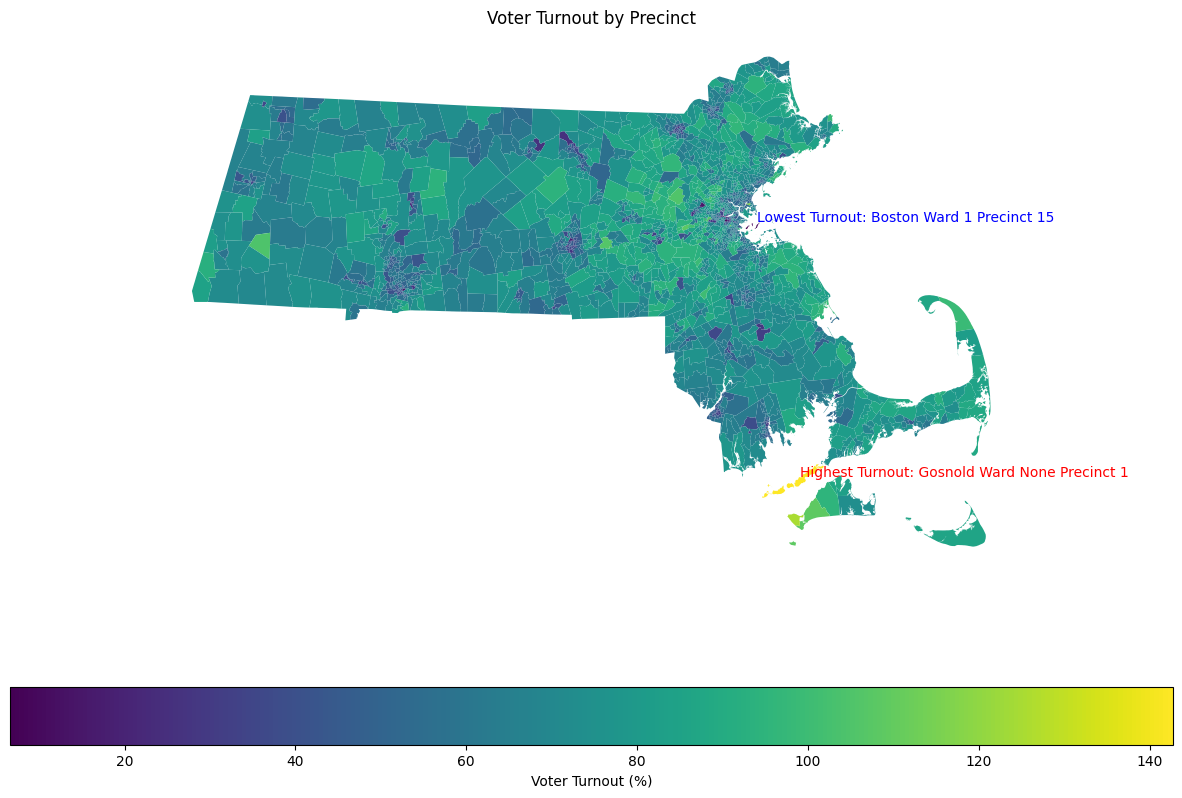

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plotting the choropleth map
fig, ax = plt.subplots(1, figsize=(15, 10))
ma_ward_precinct_gdf.plot(column='Turnout', ax=ax, legend=True,
                          legend_kwds={'label': "Voter Turnout (%)", 'orientation': "horizontal"},
                          cmap='viridis')

# Annotation for the highest and lowest turnout
max_location = ma_ward_precinct_gdf.geometry.loc[ma_ward_precinct_gdf['Turnout'].idxmax()].centroid
min_location = ma_ward_precinct_gdf.geometry.loc[ma_ward_precinct_gdf['Turnout'].idxmin()].centroid

ax.annotate(f'Highest Turnout: {max_turnout_precinct_name}', xy=(max_location.x, max_location.y),
            xytext=(3, 3), textcoords="offset points", color='red')
ax.annotate(f'Lowest Turnout: {min_turnout_precinct_name}', xy=(min_location.x, min_location.y),
            xytext=(3, 3), textcoords="offset points", color='blue')

# Improving map aesthetics
ax.set_title('Voter Turnout by Precinct')
ax.set_axis_off()
plt.savefig('Voter Turnout.png', dpi = 300)
plt.show()


Amazing!  let's admire our work.  If it comes out scrunched, click it to expand.

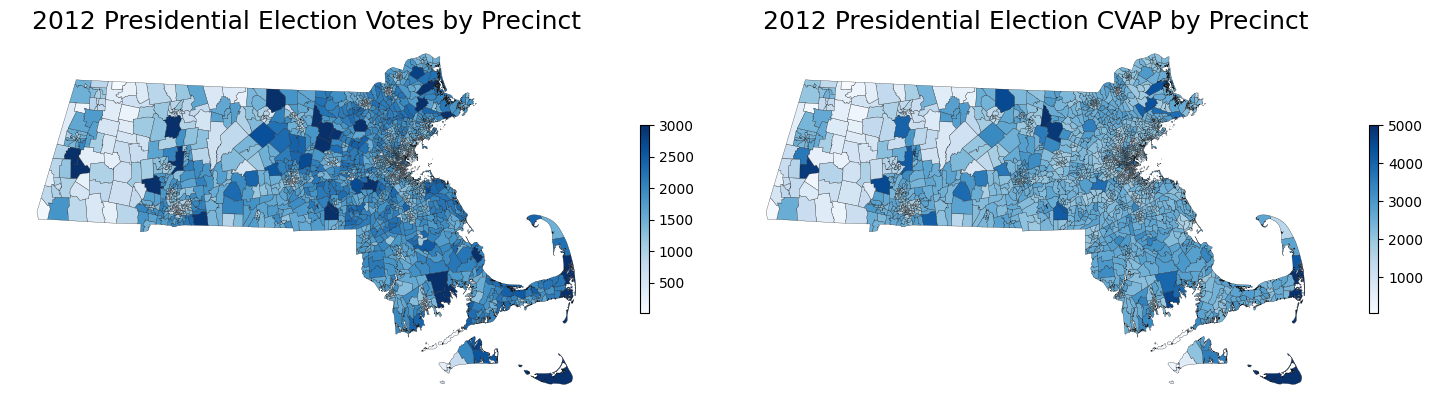

In [40]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].axis('off')
ax[0].set_title("2012 Presidential Election Votes by Precinct", fontsize=18)
ma_ward_precinct_gdf.plot(
    ax=ax[0],
    column="Total Votes",
    vmin=min(ma_ward_precinct_gdf["Total Votes"]),
    vmax=3000, # set manually so that outliers don't skew the picture too much
    **choropleth_style,
)

ax[1].axis('off')
ax[1].set_title("2012 Presidential Election CVAP by Precinct", fontsize=18)
ma_ward_precinct_gdf.plot(
    ax=ax[1],
    column="CVAP",
    vmin=min(ma_ward_precinct_gdf["CVAP"]),
    vmax=5000, # set manually so that outliers don't skew the picture too much
    **choropleth_style,
)
plt.tight_layout()
plt.show()


#Homework 5, due Tuesday March 11, 1:25pm
First, a simple exercise: find the turnout in each precinct by getting total votes as a share of CVAP.  Find the top precinct and the bottom precinct in terms of their turnout, and plot a choropleth of turnout across the state.

Next, the usual thing:  find something interesting, investigate it, and show us a data product.  This can be from the Schumer part of the notebook or the turnout part of the notebook.

Extra credit:  go seek out your own election data!  (Totally optional.)